# snATAC-seq - Assess structure scRNA-seq subset from Pijuan-Sala et al., 2019

Blanca Pijuan-Sala

October 2019

In [160]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as pl
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
import episcanpy.api as epi
import anndata as ad
import numpy as np

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
#Set working directory
wd = '/path/to/directory/sample_pooled_preprocess_revision1/'
direc = wd
sc.settings.figdir = './plots/'
results_file="./write/20191030_scRNAseq_endothelium_allantois.h5ad"

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.0 scipy==1.3.0 pandas==0.24.0 scikit-learn==0.20.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [161]:
##====== Read counts ======##

filename_data = direc + '21_endothelium_scRNAseq/data/countsData_endothelium_logged.mtx'
filename_gene_names = direc + '21_endothelium_scRNAseq/data/genes_endothelium.txt'
filename_barcodes = direc + '21_endothelium_scRNAseq/data/cells_endothelium.txt'

print('reading counts')
adata_all_cells = sc.read(filename_data, cache=True).transpose()
adata_all_cells.X = adata_all_cells.X.astype(np.int64)
print('reading genes')
adata_all_cells.var_names = np.genfromtxt(filename_gene_names, dtype='str')
print('reading cells')
adata_all_cells.obs_names = np.genfromtxt(filename_barcodes, dtype='str')



reading counts
... reading from cache file cache/home-USSR-codex-pipeline-Data-Rebecca-Blanca-sample_pooled_preprocess_revision1-21_endothelium_scRNAseq-data-countsData_endothelium_logged.h5ad
reading genes
reading cells


In [162]:
##====== Read metadata file and set index to cell ======##

metadataFilename ='/servers/bio-shares-4/gottgens/Blanca/Experiments/PhD_BPS32/release6/data/PijuanSalaEtAl_SupplementaryTable3_revision.txt'
meta = pd.read_table(metadataFilename,delimiter="\t",header=0)
meta = meta.set_index(meta.barcode)


##======  Check columns in metadata ======##

meta.columns 

adata = adata_all_cells[np.array([i in np.array(meta['cell']) for i in adata_all_cells.obs_names]),:]
adata.shape

##======  Filter metadata so that the cells correspond to those in the counts matrix ======##


metadata00 = pd.DataFrame(np.array(meta)[np.array([cell in adata.obs_names for cell in meta['cell']]),:])
metadata00.columns = meta.columns 

metadata00 = metadata00.set_index(metadata00.cell)
metadata00.shape

(7631, 28)

In [163]:
adata.obs['celltype'] = list(metadata00.loc[:,'celltype'])
adata.obs['haem_subclust'] = list(metadata00.loc[:,'haem_subclust'])
adata.obs['stage'] = list(metadata00.loc[:,'stage'])


Trying to set attribute `.obs` of view, making a copy.


In [164]:

adata.obs['haem_subclust'] = adata.obs['haem_subclust'].fillna('Allantois')

In [165]:
all_colours = {
  "Allantois" : "#532C8A",
  "Anterior Primitive Streak" : "#c19f70",
  "Blood progenitors 1" : "#f9decf",
  "Blood progenitors 2" : "#c9a997",
  "Cardiomyocytes" :  "#B51D8D",#
  "Caudal epiblast" : "#9e6762",
  "Caudal Mesoderm" : "#3F84AA",
  "Def. endoderm" : "#F397C0",#
  "Nascent mesoderm" :  "#C594BF",#                 
  "Mixed mesoderm" :  "#DFCDE4",#
  
  "Endothelium" :  "#eda450",#                              
  "Epiblast" :  "#635547",#
  "Erythroid1" :  "#C72228",#                               
  "Erythroid2" :  "#EF4E22",#   
  "Erythroid3" : "#f77b59",
  "ExE ectoderm" :  "#989898",#                            
  
  "ExE endoderm" : "#7F6874",#                     
  "ExE mesoderm" :  "#8870ad",#
  
  
  "Rostral neurectoderm" :  "#65A83E",#
  "Forebrain/Midbrain/Hindbrain" : "#647a4f",
  
  
  "Gut" :  "#EF5A9D",#[19] "Foregut"                                     
  "Haematoendothelial progenitors" :  "#FBBE92",#            
  "Caudal neurectoderm": "#354E23",
  
  
  "Intermediate mesoderm" :  "#139992",#    
  "Neural crest": "#C3C388",
  
  "NMP" :  "#8EC792",#                                    
  "Notochord" :  "#0F4A9C",#                          
  "Paraxial mesoderm" :  "#8DB5CE",#
  "Parietal endoderm" :  "#1A1A1A",                         
  "PGC" :  "#FACB12",                                       
  
  "Pharyngeal mesoderm" :  "#C9EBFB",#                      
  "Primitive Streak" :  "#DABE99",#
  "Mesenchyme" : "#ed8f84",
  "Somitic mesoderm" :  "#005579",#                                  
  "Spinal cord" :  "#CDE088",#                     
  "Surface ectoderm" : "#BBDCA8",#                          
  
  
  "Visceral endoderm" : "#F6BFCB",#
  "Mes1": "#c4a6b2",#
  "Mes2":"#ca728c",#
  
  "Cardiomyocytes" :  "#B51D8D",
  


}

               

colPalette= [all_colours[i] for i in sorted(np.unique(adata.obs['celltype']))]

In [166]:
all_colours_sub = {
      "Allantois" : "#532C8A",

 "Mes1": "#c4a6b2",#
  "Mes2": "#ca728c",#
  
  
  "BP1" : "#6460c5",#
  "BP2" : "#96b8e4",#
  "BP3" : "#07499f",#changed
  "BP4" :"#036ef9",#changed
  
  "Haem1": "#bb22a7",
  "Haem2" : "#f695e9",
  "Haem3": "#02f9ff",#changed
  
  "Haem4" : "#4c4a81",#changed
  
  "EC1": "#006737",#
  
  "EC2" : "#5eba46",#
  "EC3" : "#818068",#
  "EC4": "#d6de22",#
  "EC5":"#5f7238",#
  "EC6":"#2ab572",#
  "EC7":"#000000",#
  "EC8":"#a0cb3b",#
  
  "Ery1":"#f67a58",#
  "Ery2" :"#a26724",#
  "Ery3":"#cdaf7f",#
  "Ery4": "#625218",#
  
  "My" : "#c62127" ,#
  "Mk": "#f6931d",#
"NaN" : "purple" #

  
}

colPalette_sub = [all_colours_sub[i] for i in sorted(np.unique(adata.obs['haem_subclust']))]

In [167]:


##====== Create colour palettes for stages ======##

bluePal = [ "#E3FCFA","#C1ECEF", "#A3D4E3", "#86B8D6","#6C98CA","#5476BE","#3E52B1","#2B2DA5","#2B1999"]



spectralDic = {
    'E6.5':"#D53E4F",
    'E6.75':"#F46D43",
    'E7.0':"#FDAE61",
    'E7.5':"#FFFFBF",
    'E7.25':"#FEE08B",
    'E7.75':"#E6F598",
    'E8.0':"#ABDDA4",
    'E8.5':"#3288BD",
    'E8.25':"#66C2A5",
    'mixed_gastrulation': "#A9A9A9"  
    
}
spectralPal = [ "#D53E4F","#F46D43","#FDAE61","#FFFFBF","#FEE08B","#E6F598","#ABDDA4","#3288BD", "#66C2A5","#A9A9A9"]



In [168]:
##====== Create colour palette for gene expression profiles ======##

from matplotlib.colors import LinearSegmentedColormap
rmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=['lightgrey', 'thistle', 'red', 'darkred'])

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#BFBFBF","#6495ED","#000000"])

In [169]:
from scipy.io import mmread

PCA = mmread(direc + '21_endothelium_scRNAseq/data/counts_endothelium_PCAcorrected.mtx')
adata.obsm['X_pca'] = PCA.todense()

# Visualisation and clustering

In [170]:
sc.pp.neighbors(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:08)


In [171]:
sc.tl.umap(adata,random_state=1)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


In [172]:
sc.tl.louvain(adata,random_state=2,resolution=1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


... storing 'celltype' as categorical
... storing 'haem_subclust' as categorical
... storing 'stage' as categorical


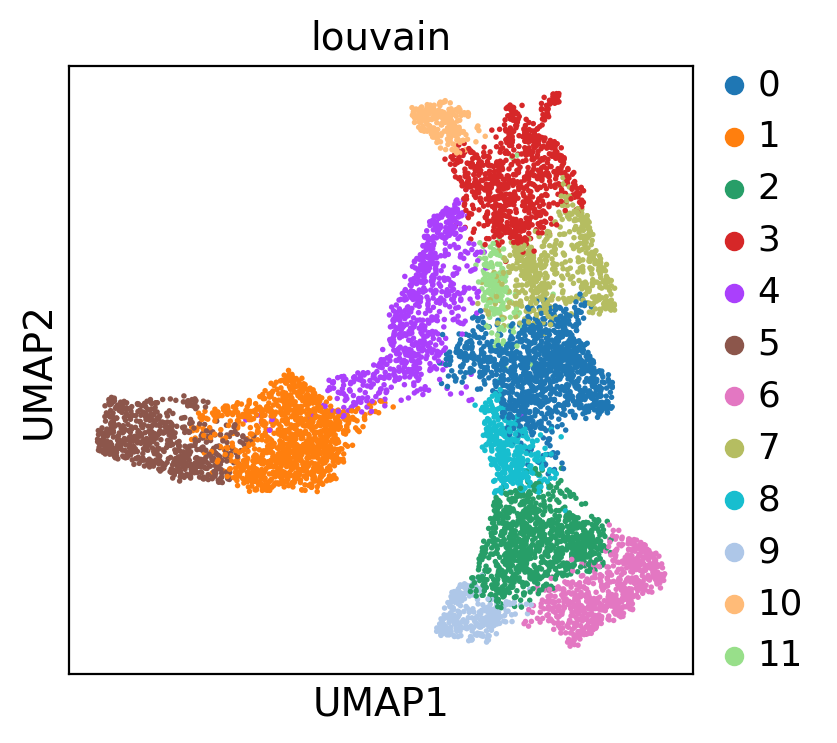

In [173]:
sc.pl.umap(adata, color=['louvain'])

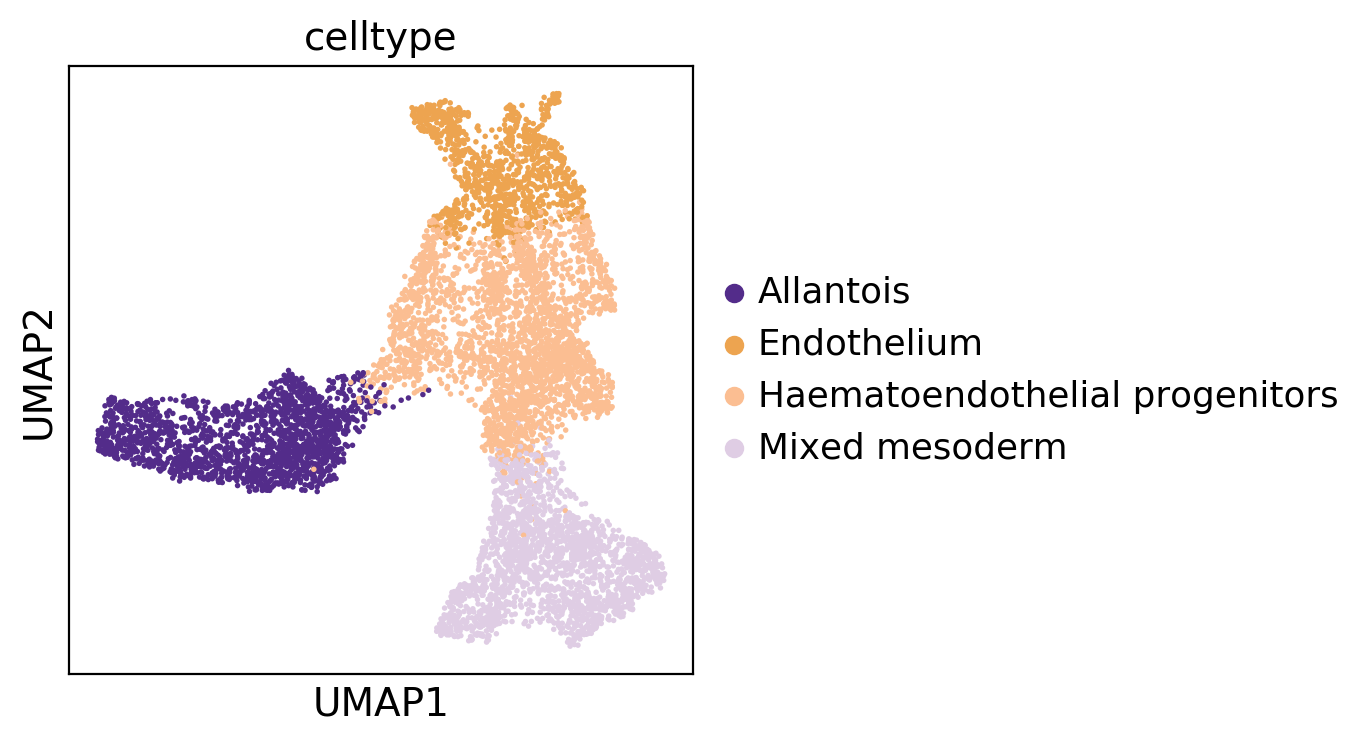

In [174]:
sc.pl.umap(adata, color=['celltype'],palette=colPalette)

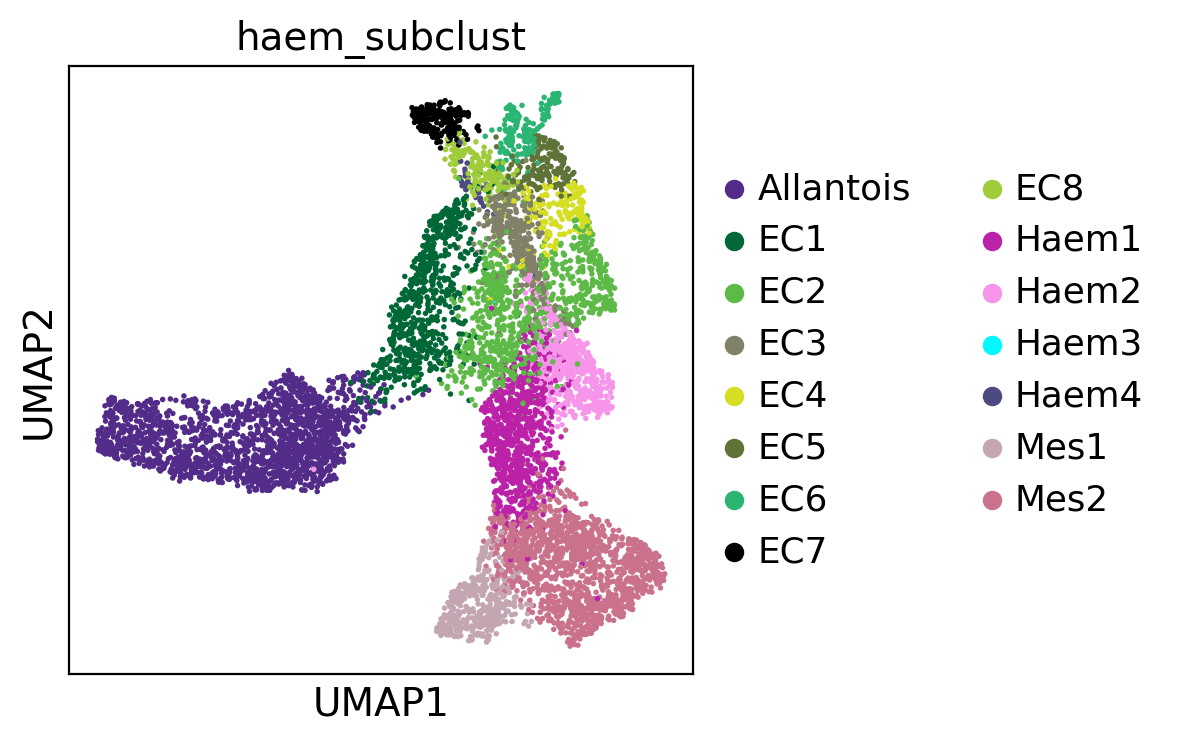

In [175]:
sc.pl.umap(adata, color=['haem_subclust'],palette=colPalette_sub)

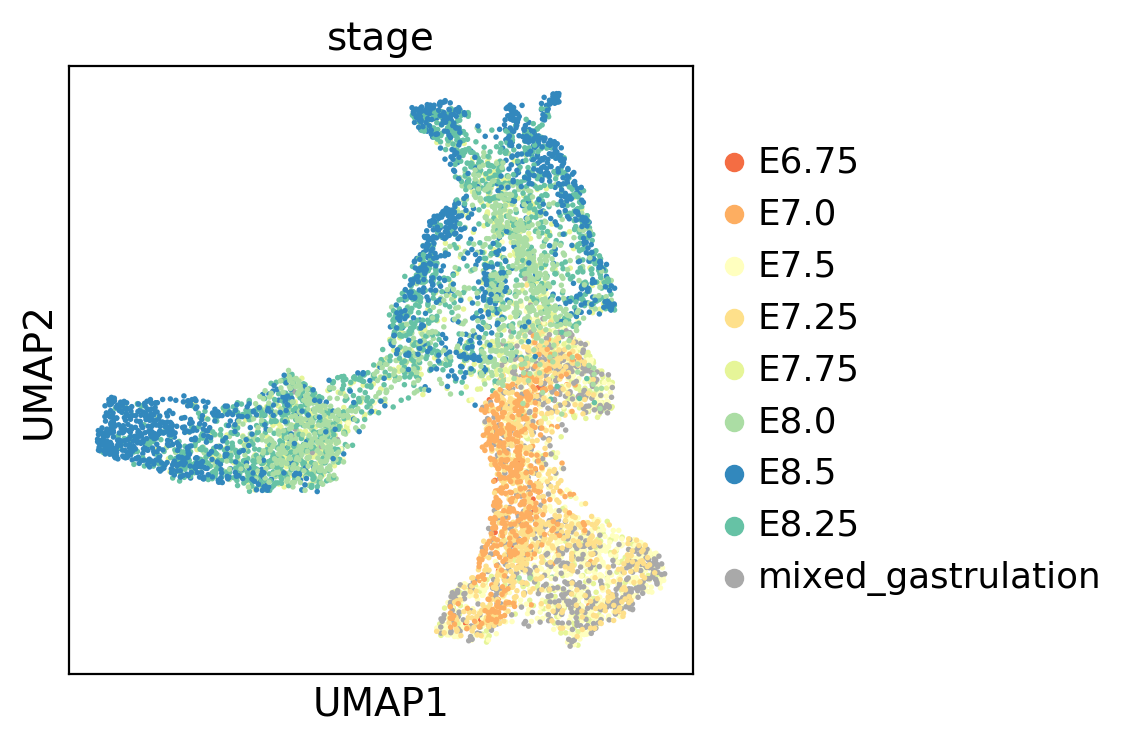

In [176]:
spectralPal = [ "#F46D43","#FDAE61","#FFFFBF","#FEE08B","#E6F598","#ABDDA4","#3288BD", "#66C2A5","#A9A9A9"]

sc.pl.umap(adata, color=['stage'],palette=spectralPal)

In [177]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9973636  0.99558514 0.9868085  0.98317456 0.97441185
     0.97373295 0.96915454 0.9619552  0.95467836 0.94841295 0.9412107
     0.9364974  0.9328432  0.9301114 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


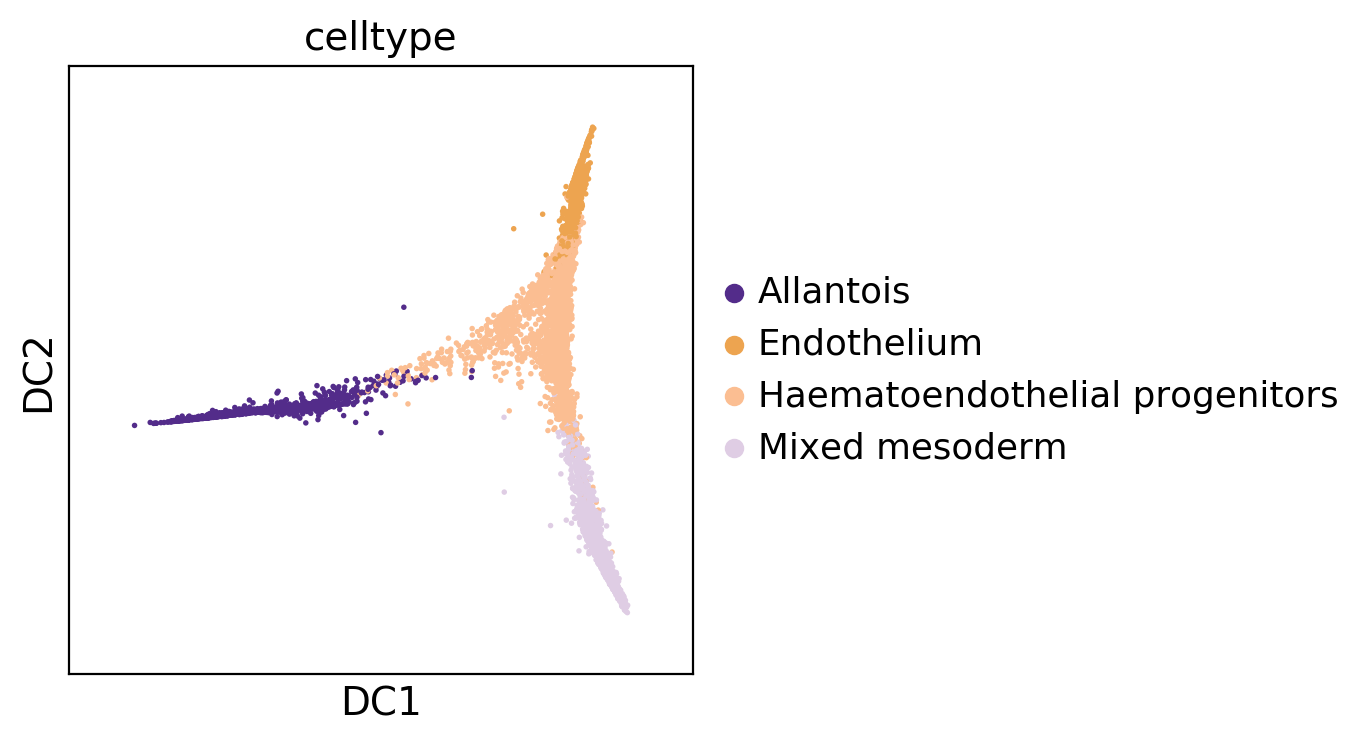

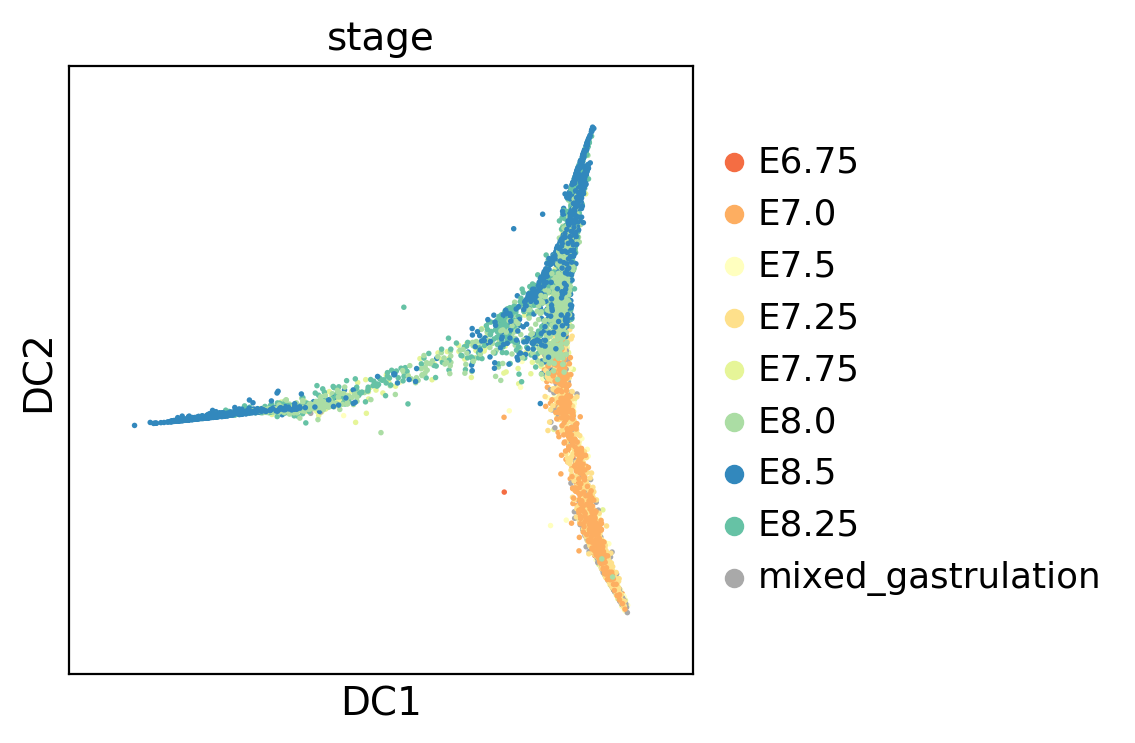

In [178]:
sc.pl.diffmap(adata, color=[ 'celltype'],palette=colPalette)
sc.pl.diffmap(adata, color=['stage'],palette=spectralPal)

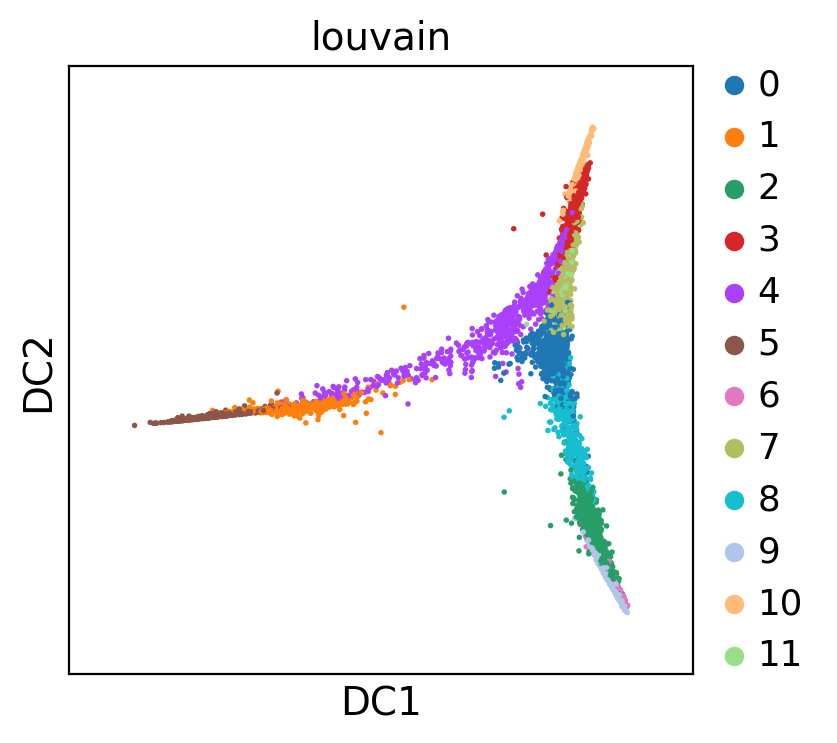

In [179]:
sc.pl.diffmap(adata, color=[ 'louvain'])


In [180]:
sc.tl.draw_graph(adata)


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:36)


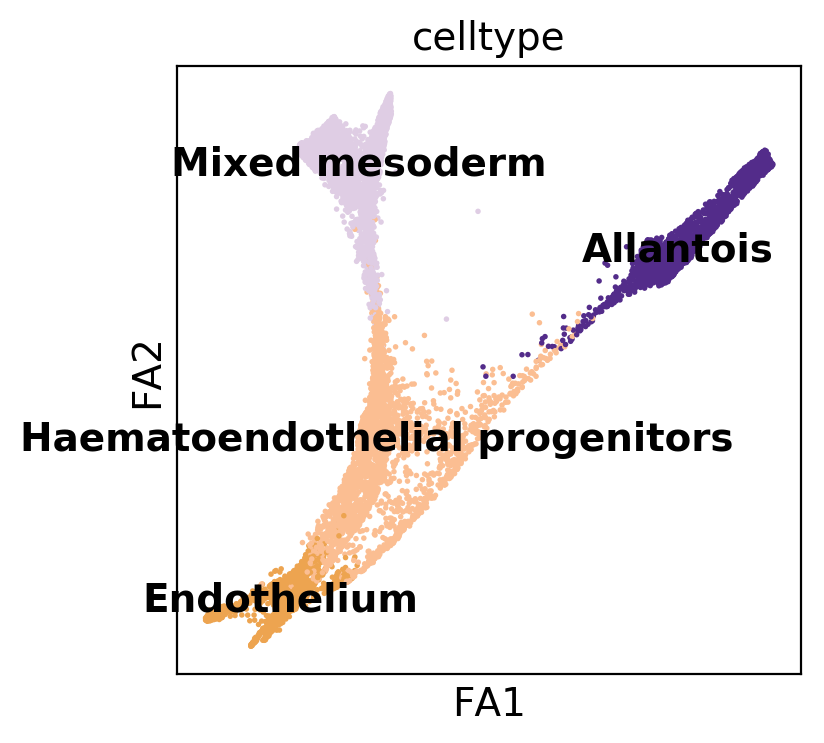

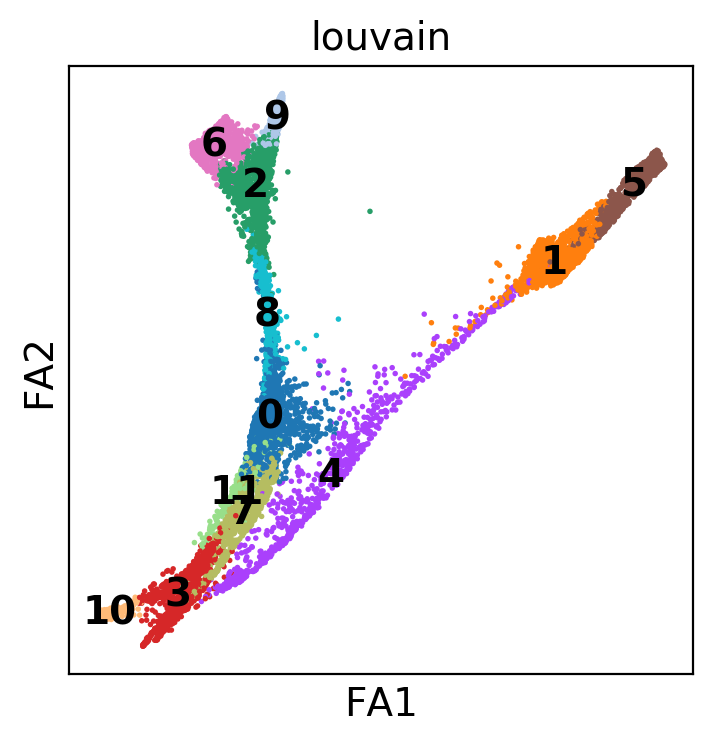

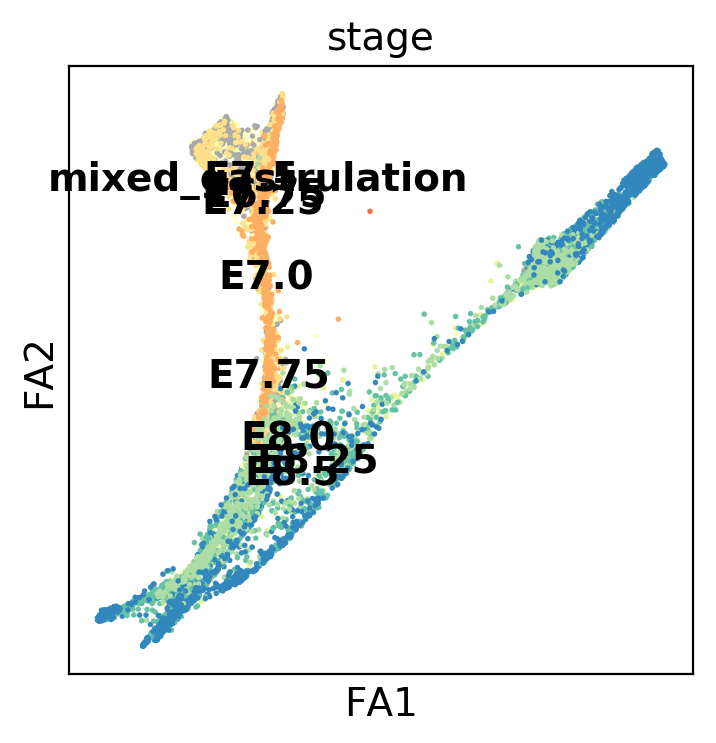

In [181]:
sc.pl.draw_graph(adata, color='celltype', legend_loc='on data',palette=colPalette)
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data')
sc.pl.draw_graph(adata, color='stage', legend_loc='on data',palette=spectralPal)


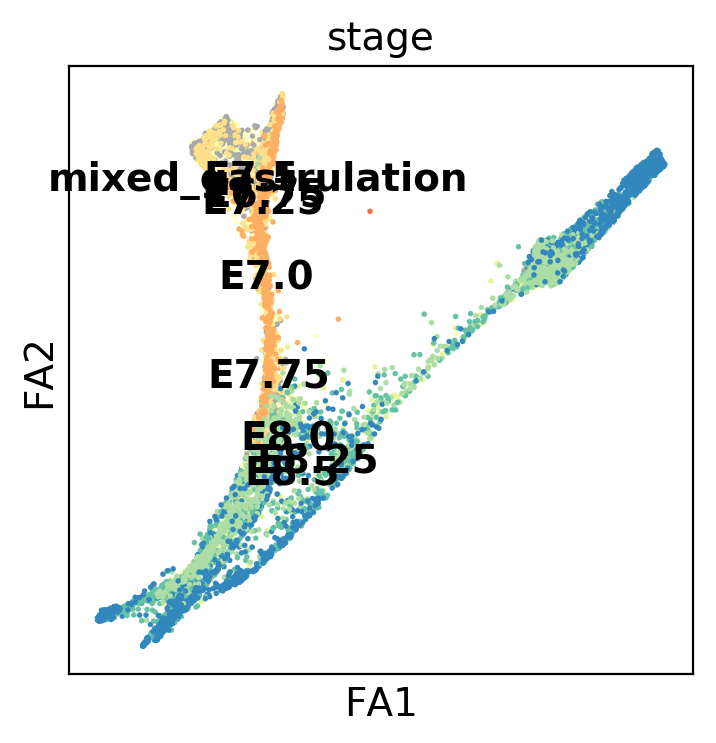

In [182]:
sc.pl.draw_graph(adata, color='stage', legend_loc='on data',palette=spectralPal)


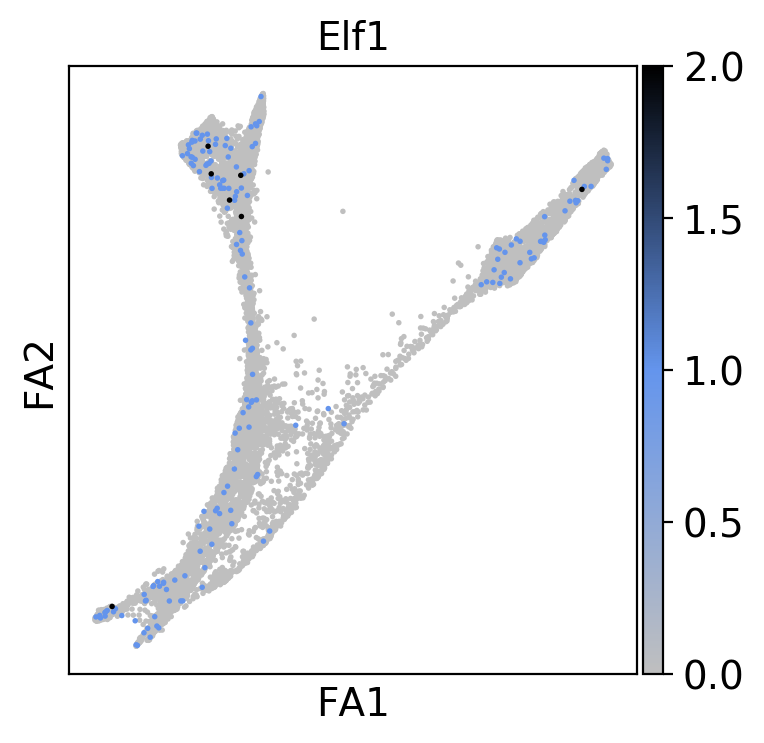

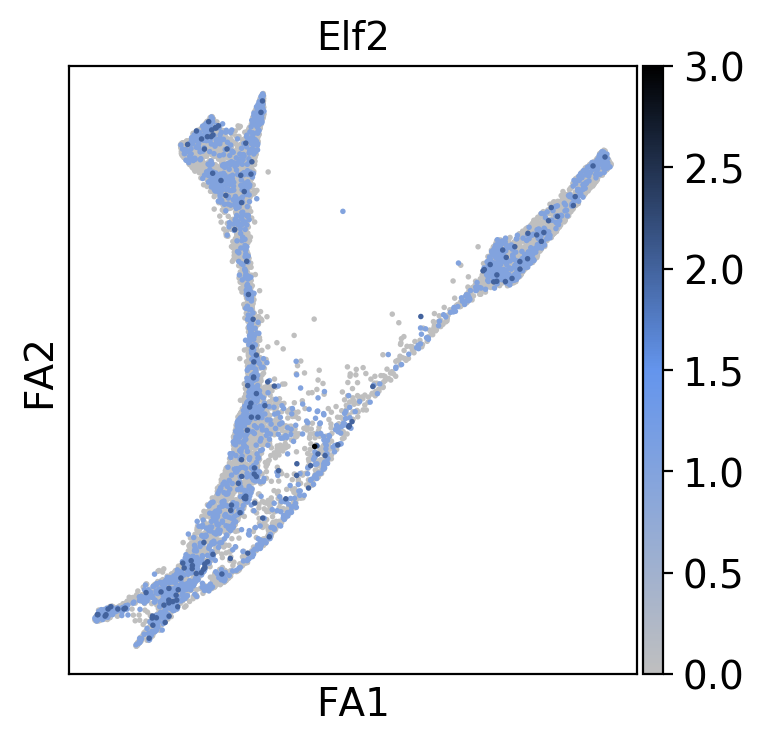

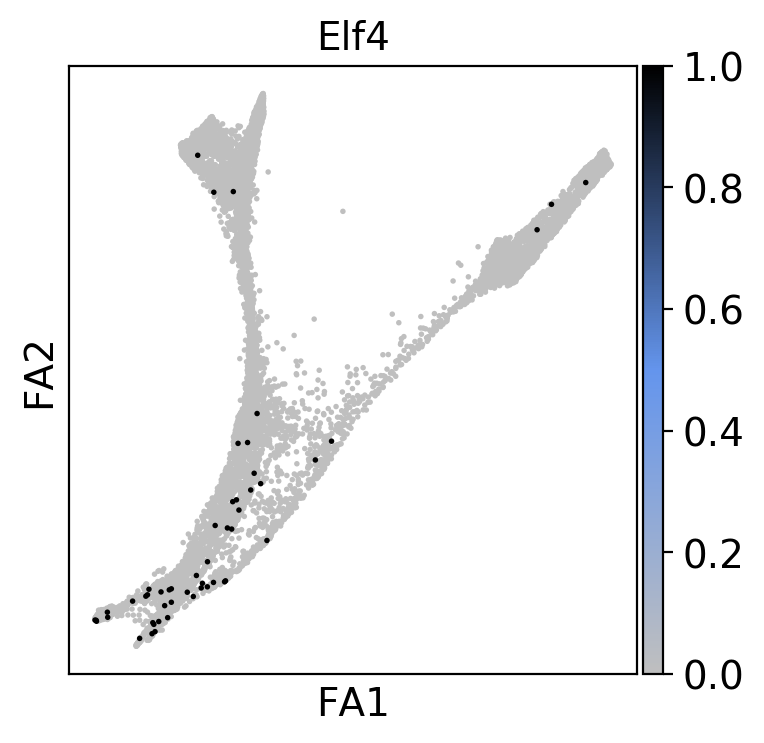

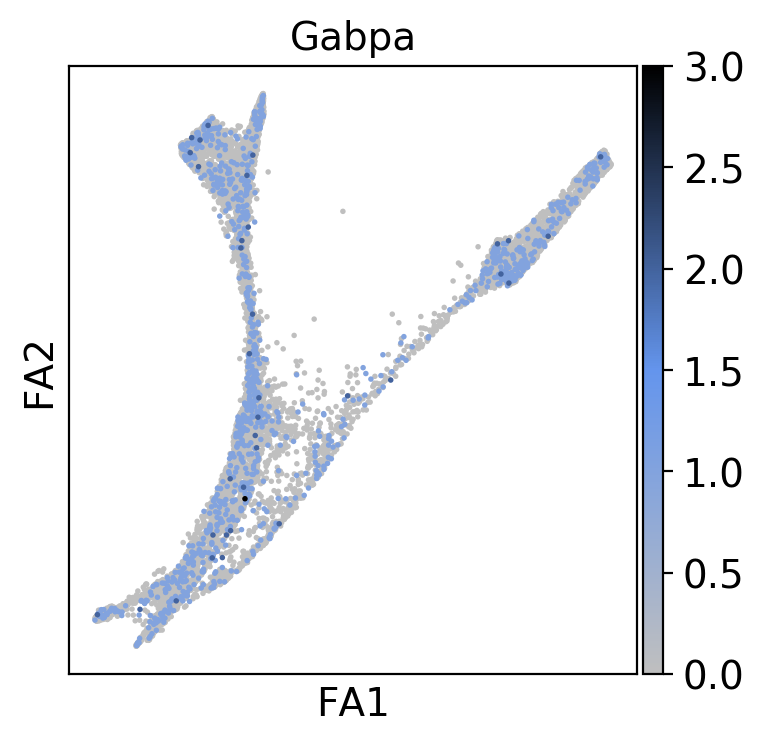

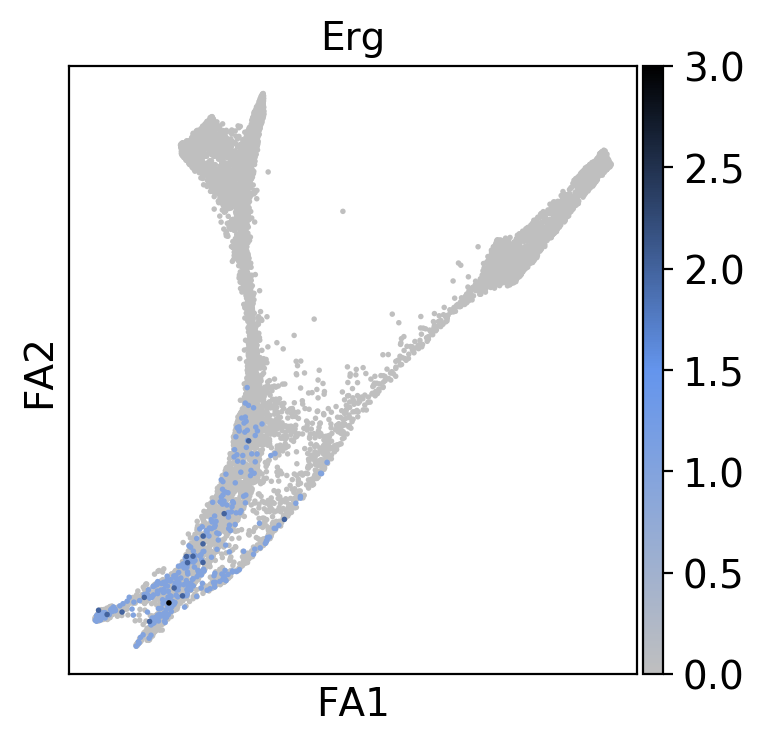

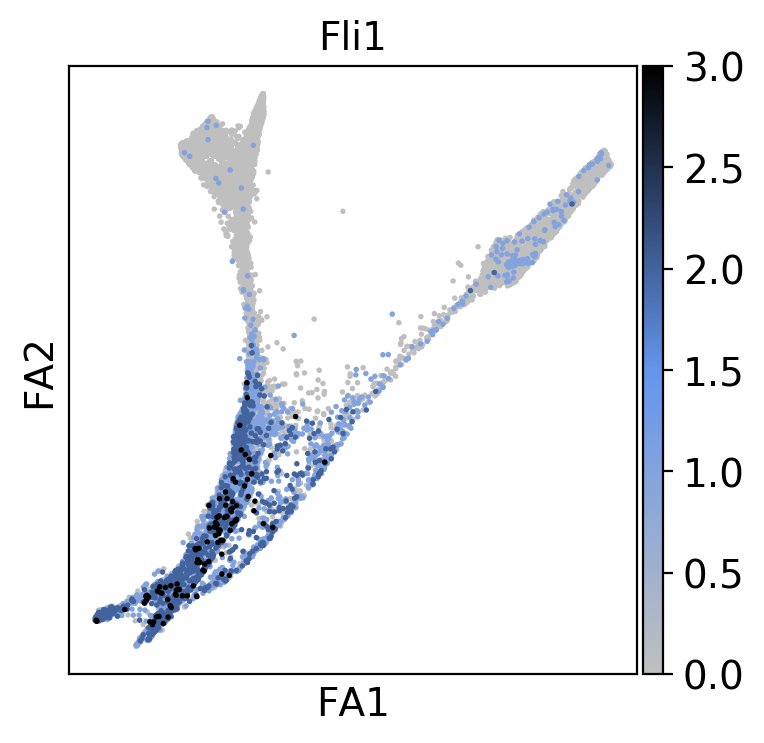

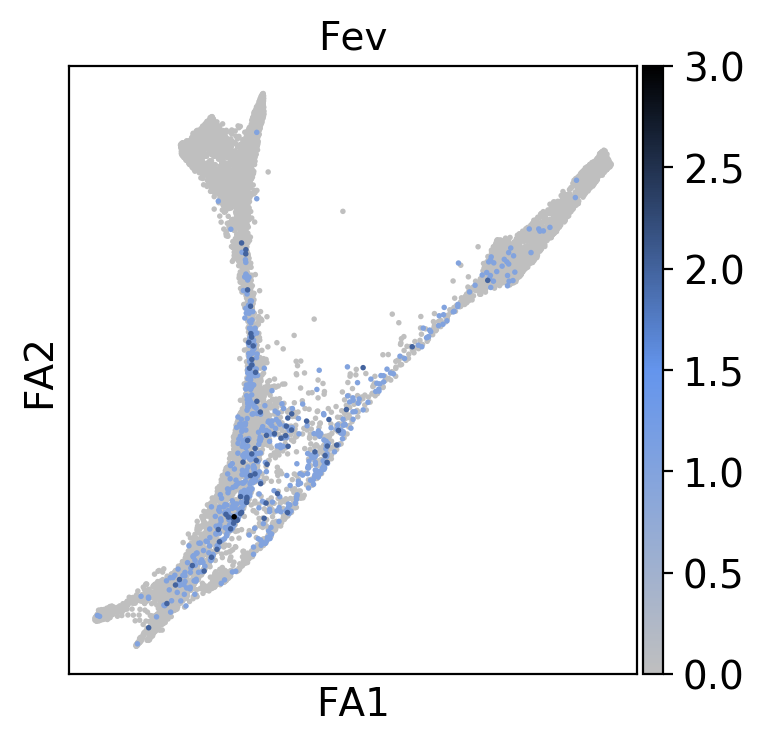

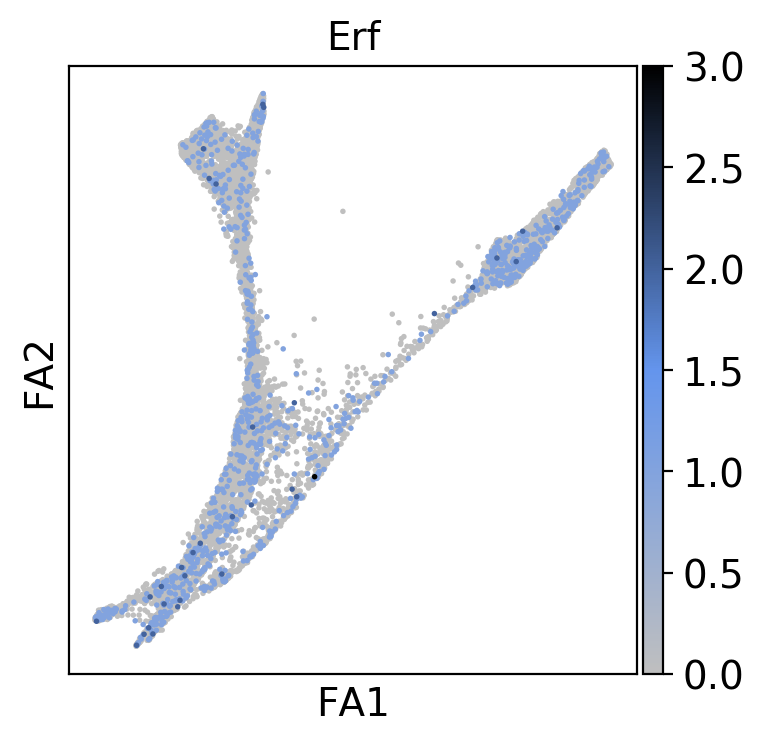

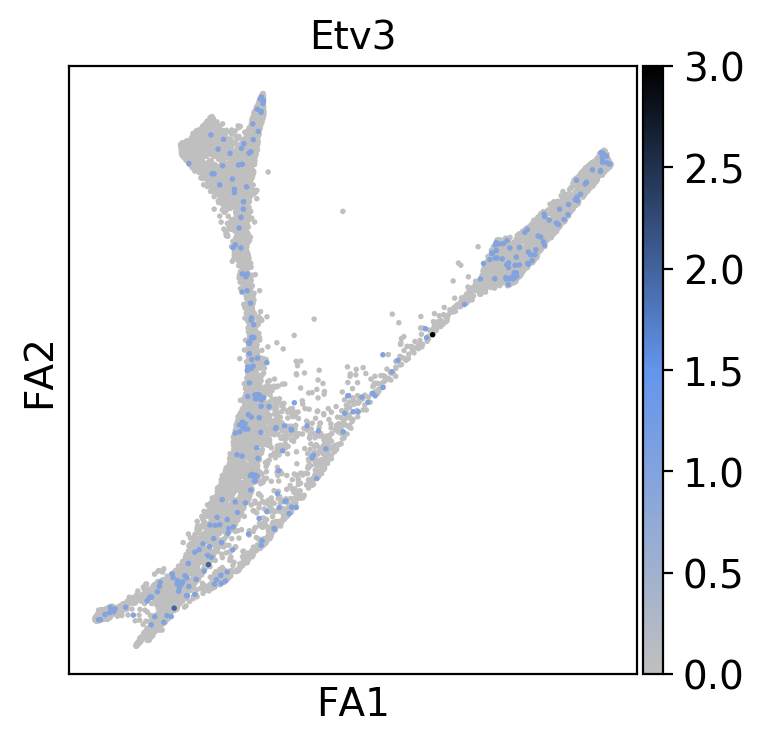

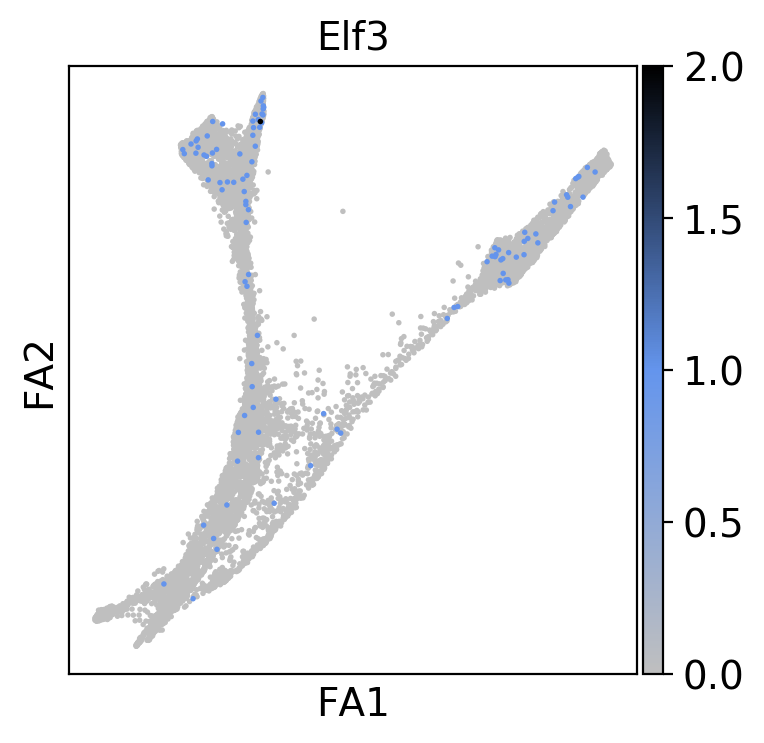

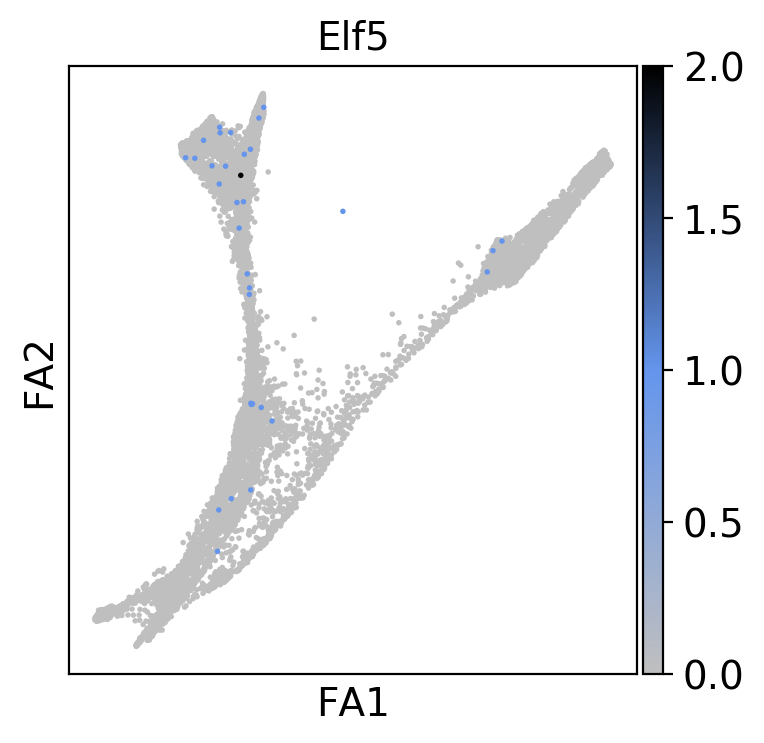

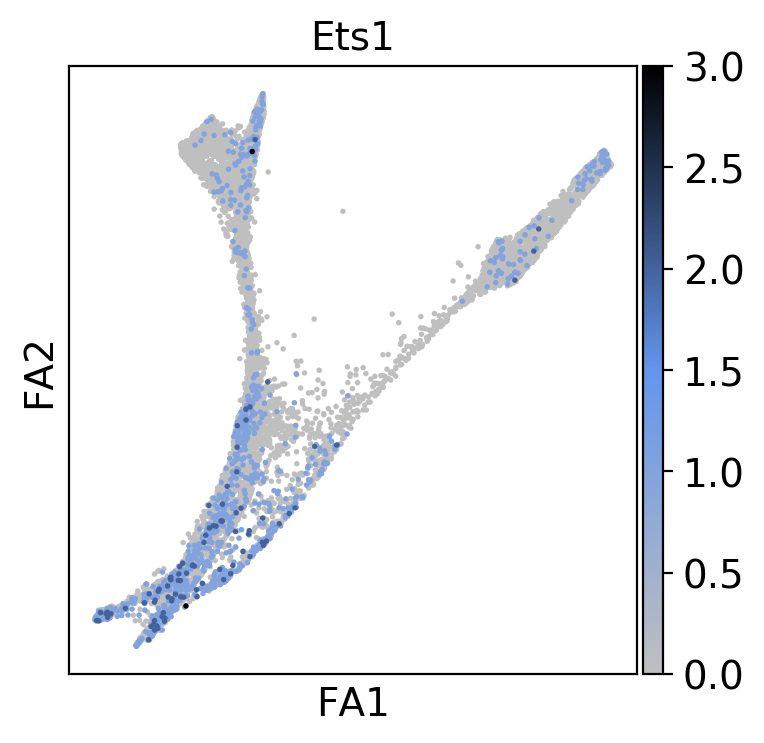

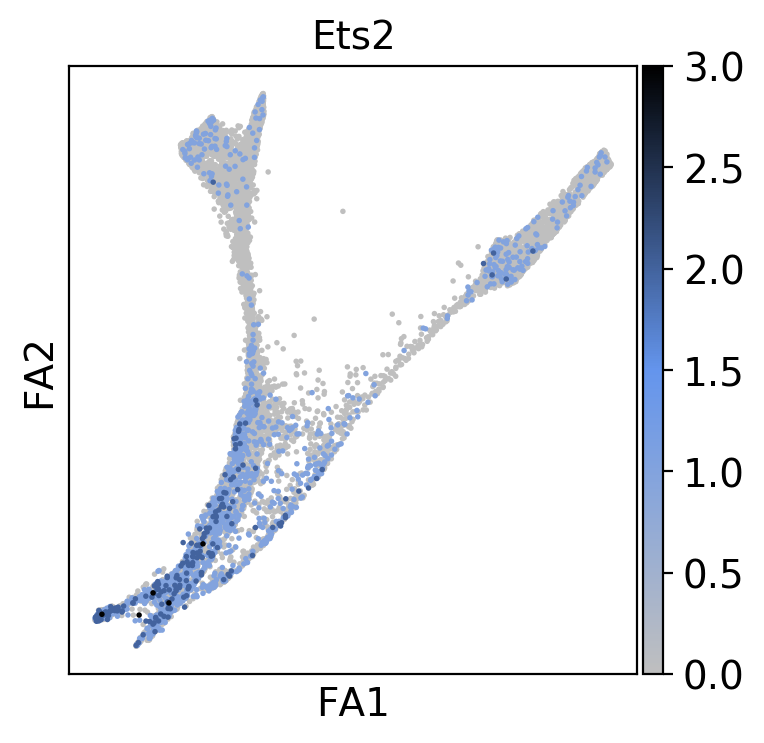

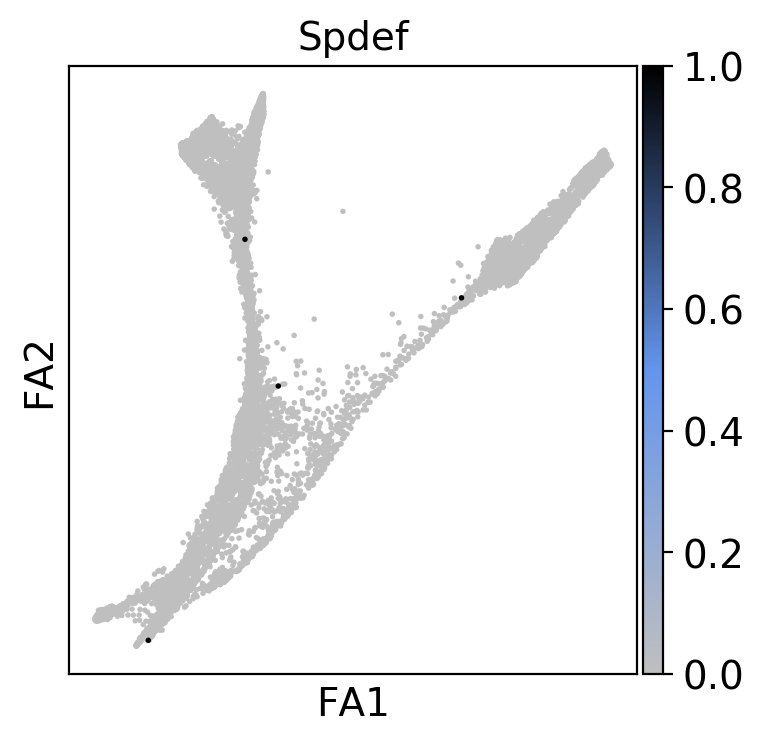

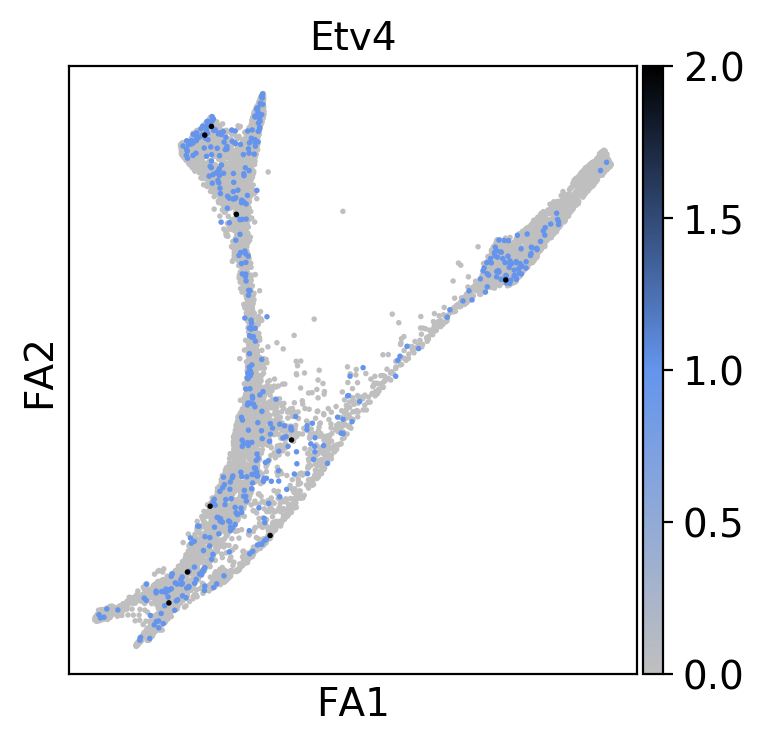

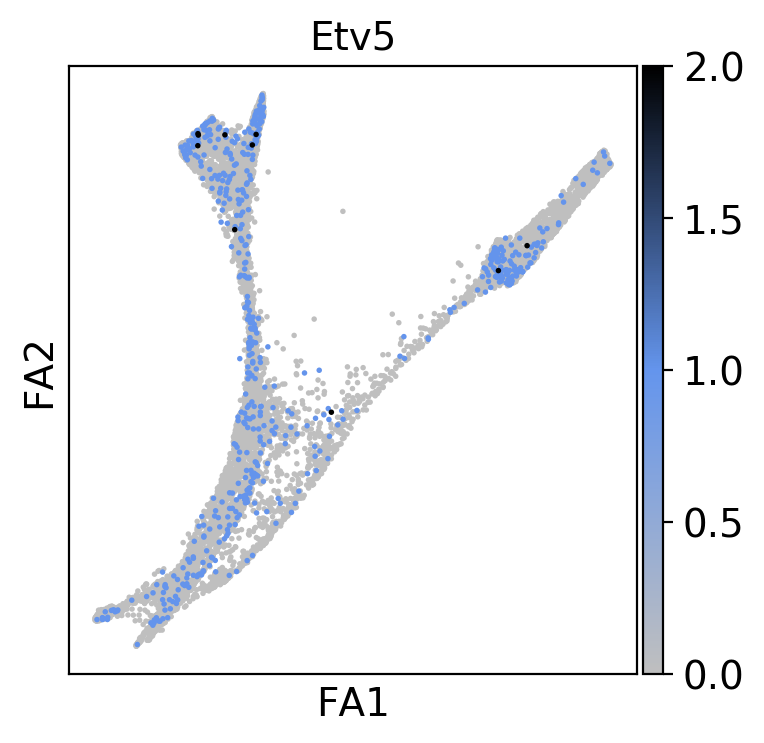

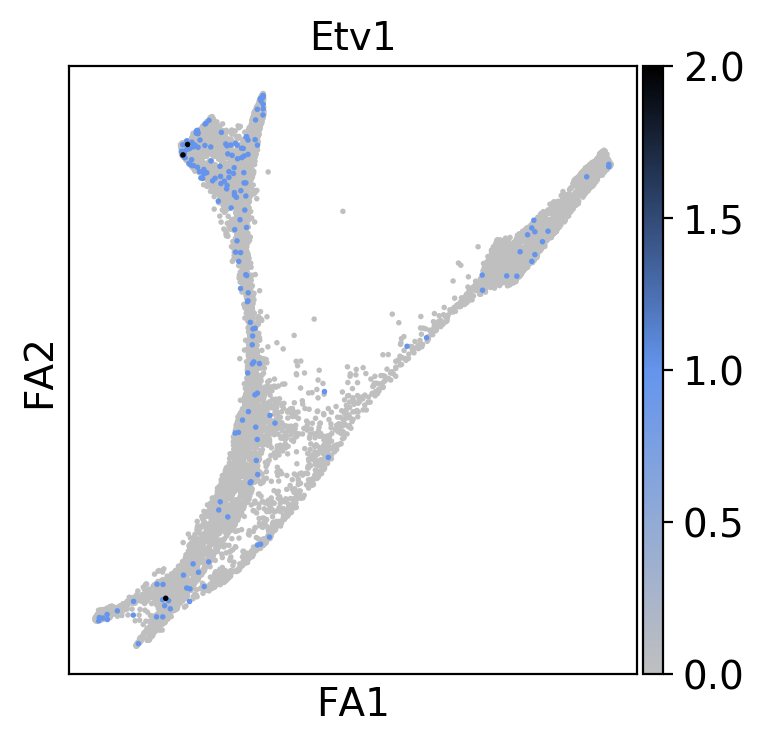

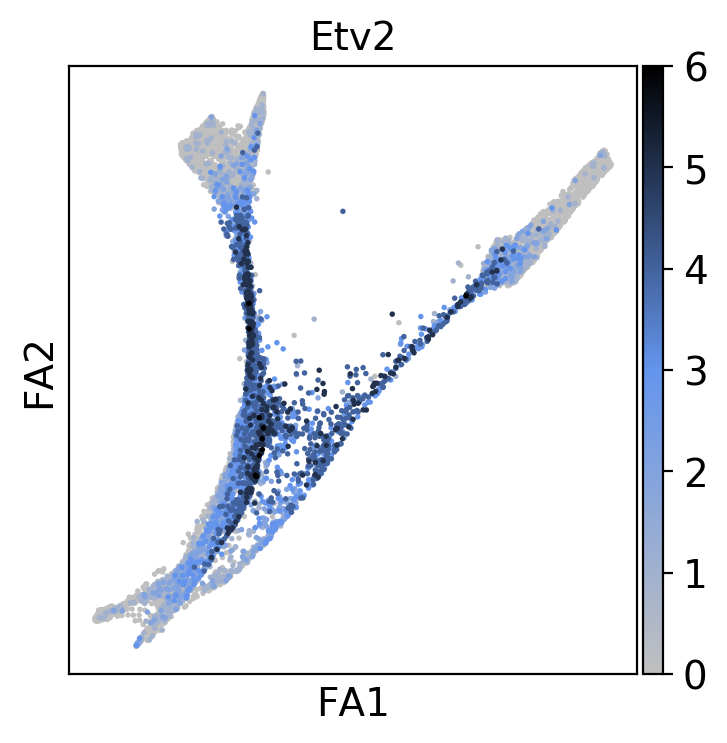

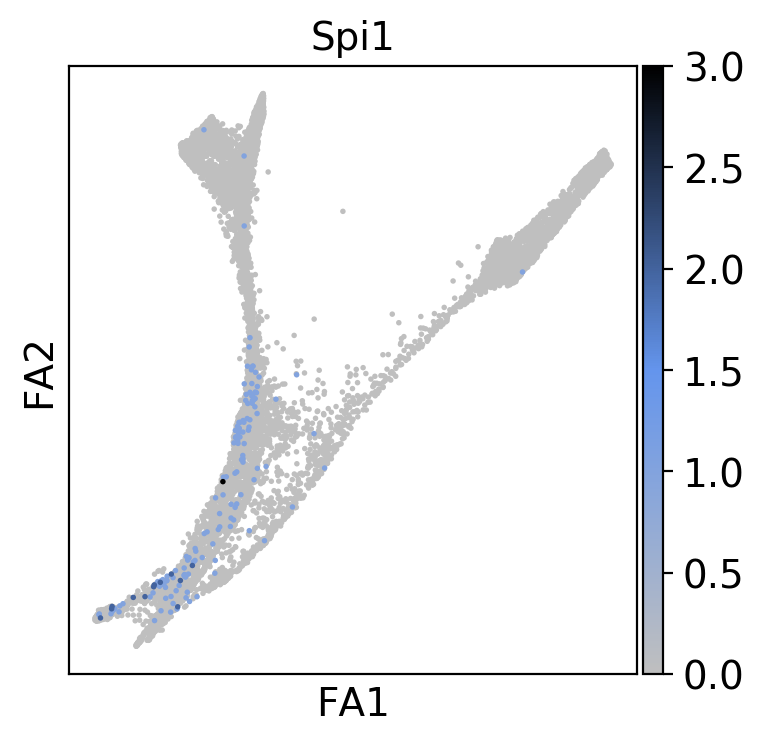

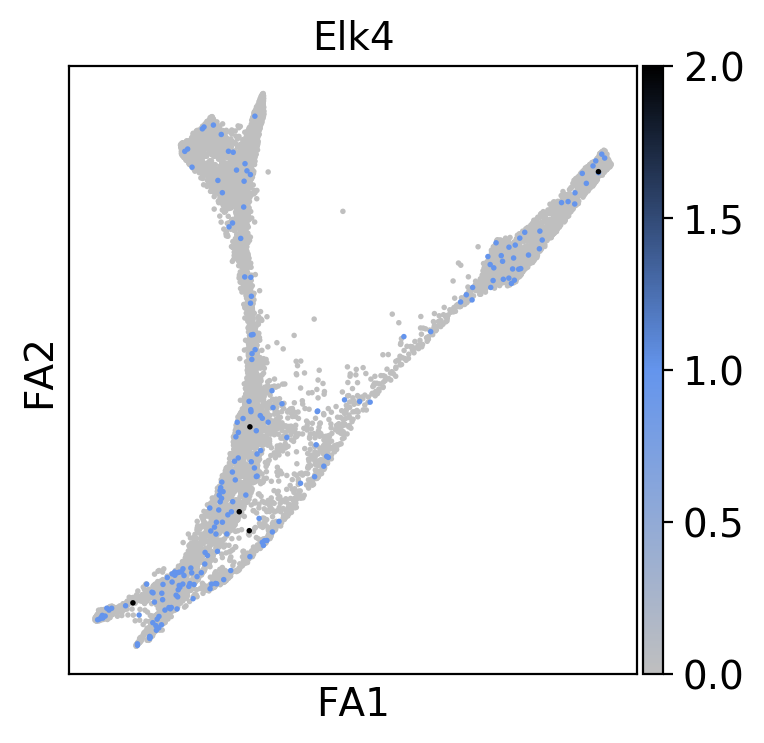

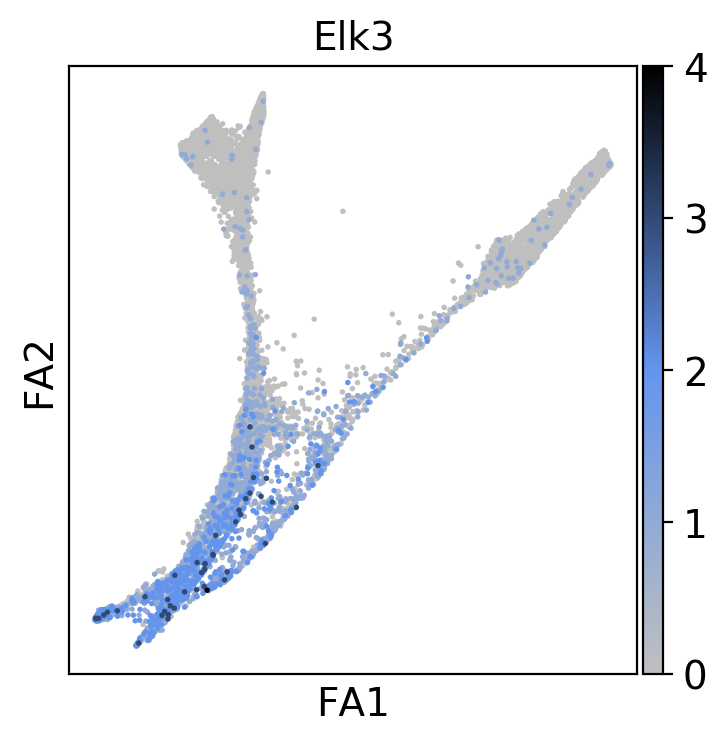

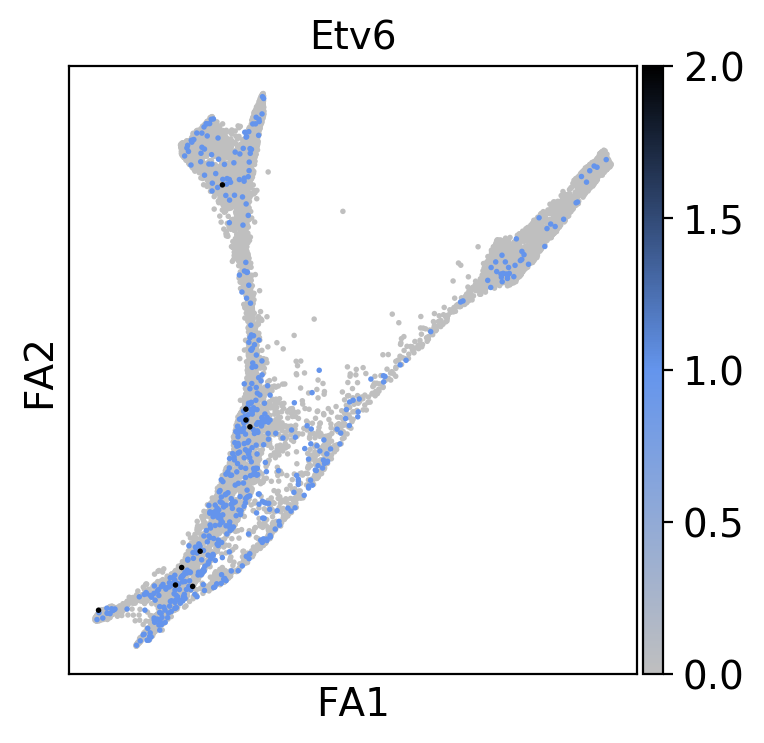

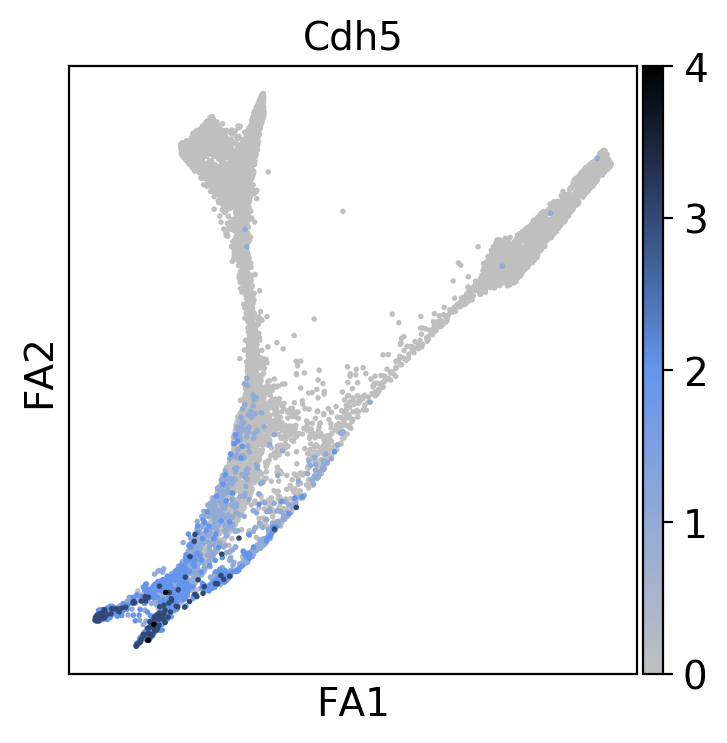

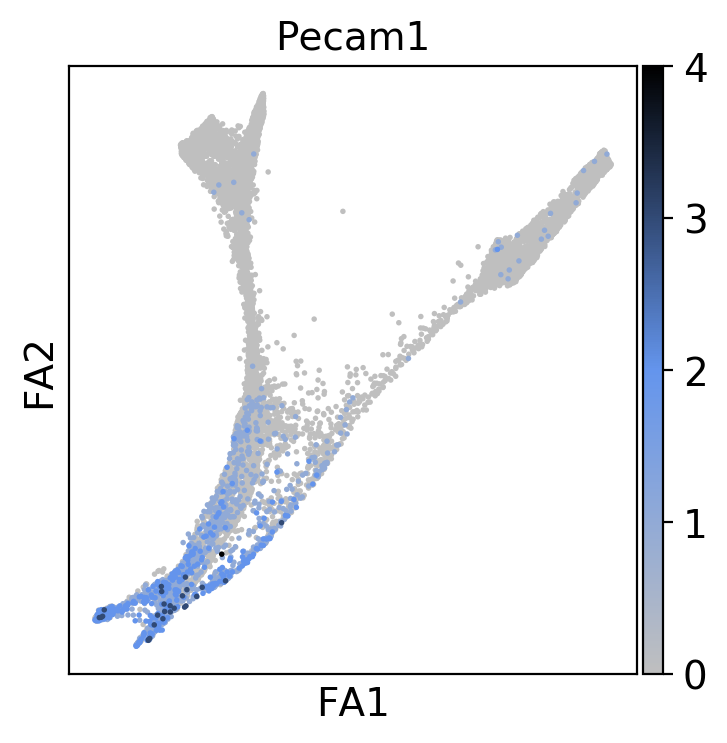

In [183]:
genes = ["ENSMUSG00000036461", "ENSMUSG00000037174", "ENSMUSG00000031103" ,"ENSMUSG00000008976",
 "ENSMUSG00000040732" ,"ENSMUSG00000016087", "ENSMUSG00000055197", "ENSMUSG00000040857",
 "ENSMUSG00000003382", "ENSMUSG00000003051", "ENSMUSG00000027186", "ENSMUSG00000032035",
 "ENSMUSG00000022895" ,"ENSMUSG00000024215" ,"ENSMUSG00000017724" ,"ENSMUSG00000013089",
 "ENSMUSG00000004151" ,"ENSMUSG00000006311", "ENSMUSG00000002111" ,"ENSMUSG00000026436",
 "ENSMUSG00000008398" ,"ENSMUSG00000030199",
    
    'ENSMUSG00000031871','ENSMUSG00000020717']

geneNames = ["Elf1",  "Elf2" , "Elf4" , "Gabpa", "Erg" ,  "Fli1" , "Fev"  , "Erf" ,  "Etv3"  ,"Elf3", 
             "Elf5" , "Ets1" , "Ets2" , "Spdef", "Etv4" , "Etv5"  ,"Etv1" , "Etv2" , "Spi1" , "Elk4",
             "Elk3" , "Etv6","Cdh5",'Pecam1']
#Etv2, Fev, Cdh5,Fli1,Erg,
for i in range(0,(len(genes))):
    sc.pl.draw_graph(adata, color=genes[i],title=geneNames[i], legend_loc='on data',cmap=cmap)


In [118]:
sc.pp.neighbors(adata)
sc.tl.paga(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


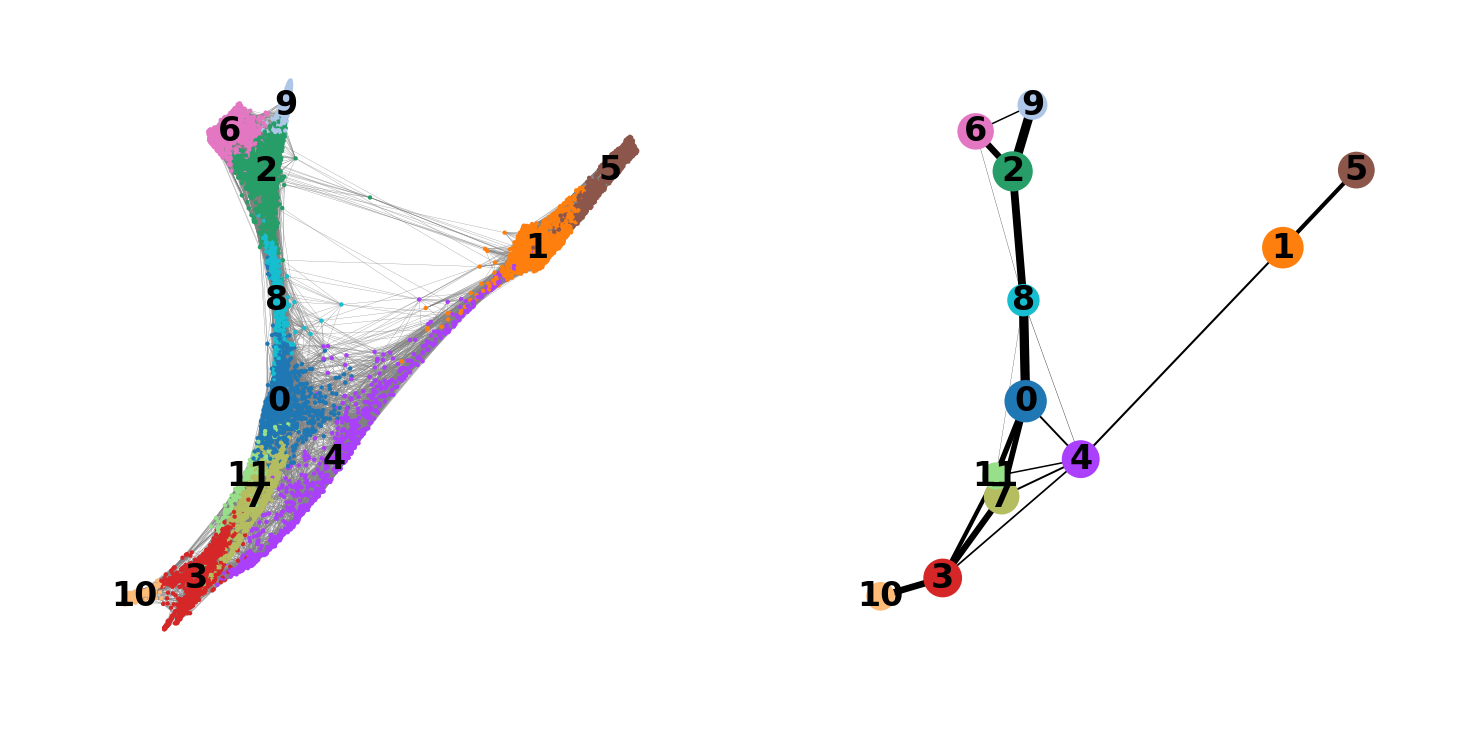

In [128]:
sc.pl.paga_compare(
    adata, title='', right_margin=0.2, size=10, edge_width_scale=0.5,basis="draw_graph_fa",
    legend_fontsize=12, fontsize=12, frameon=False, edges=True)

In [130]:
position = adata.uns['paga']['pos']

--> added 'pos', the PAGA positions (adata.uns['paga'])


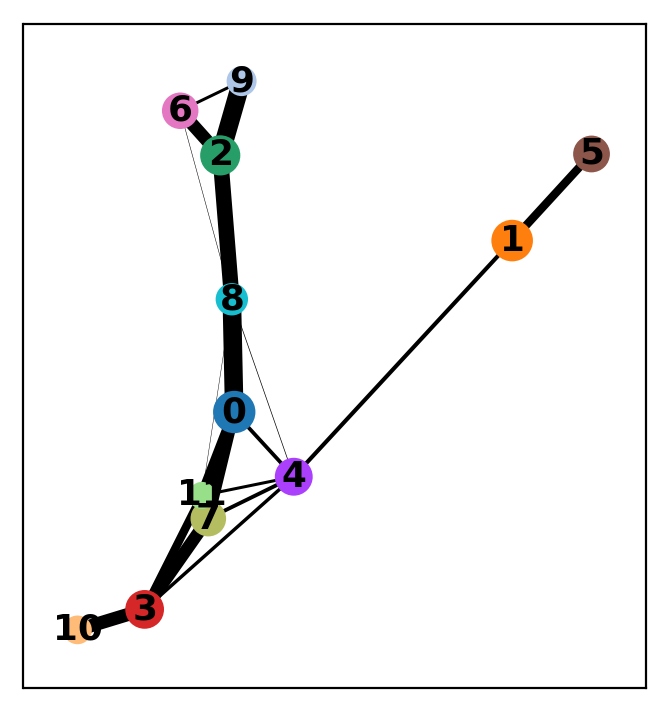

In [131]:
sc.pl.paga(adata, color=['louvain'],pos=position)


--> added 'pos', the PAGA positions (adata.uns['paga'])


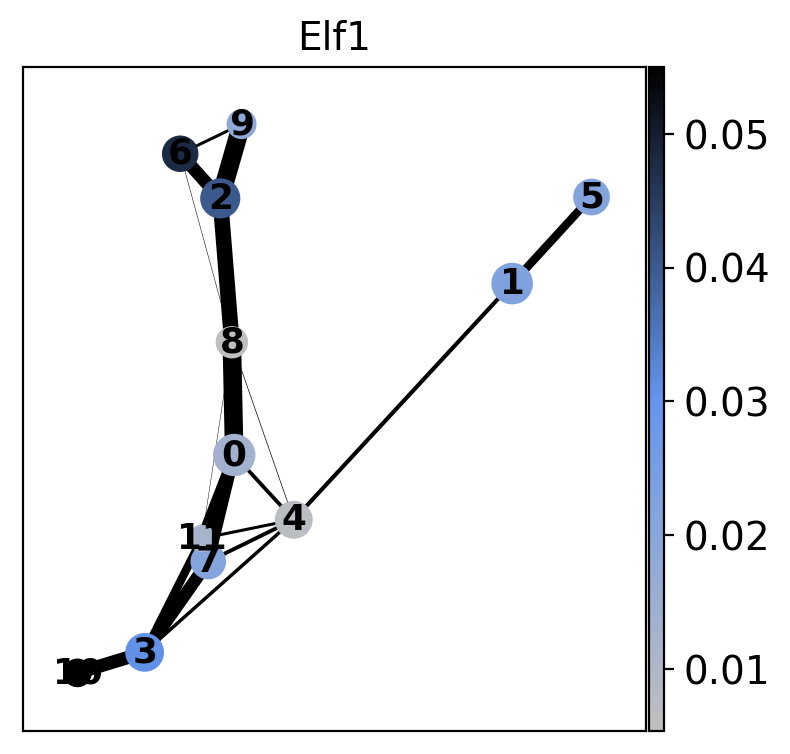

--> added 'pos', the PAGA positions (adata.uns['paga'])


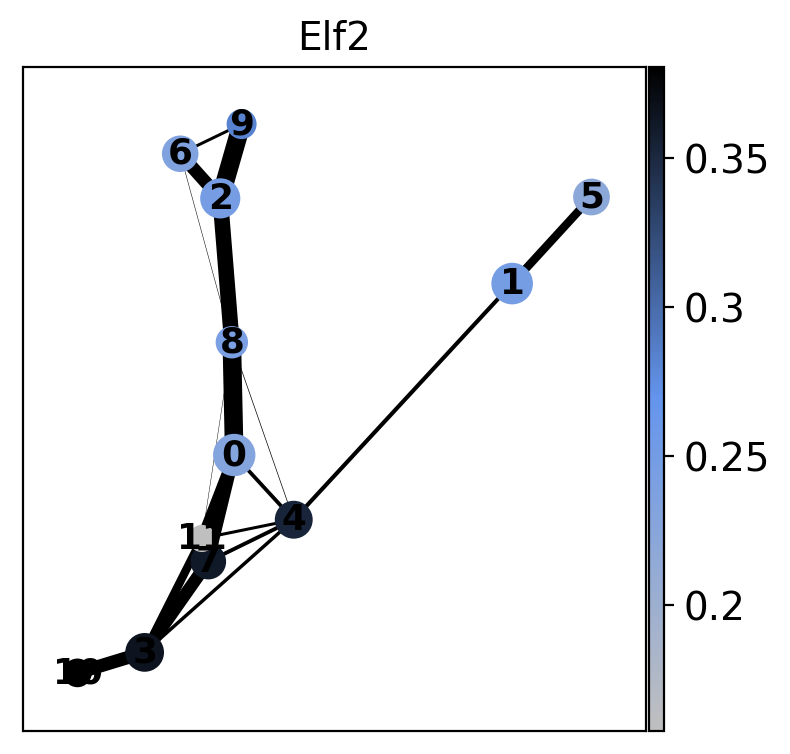

--> added 'pos', the PAGA positions (adata.uns['paga'])


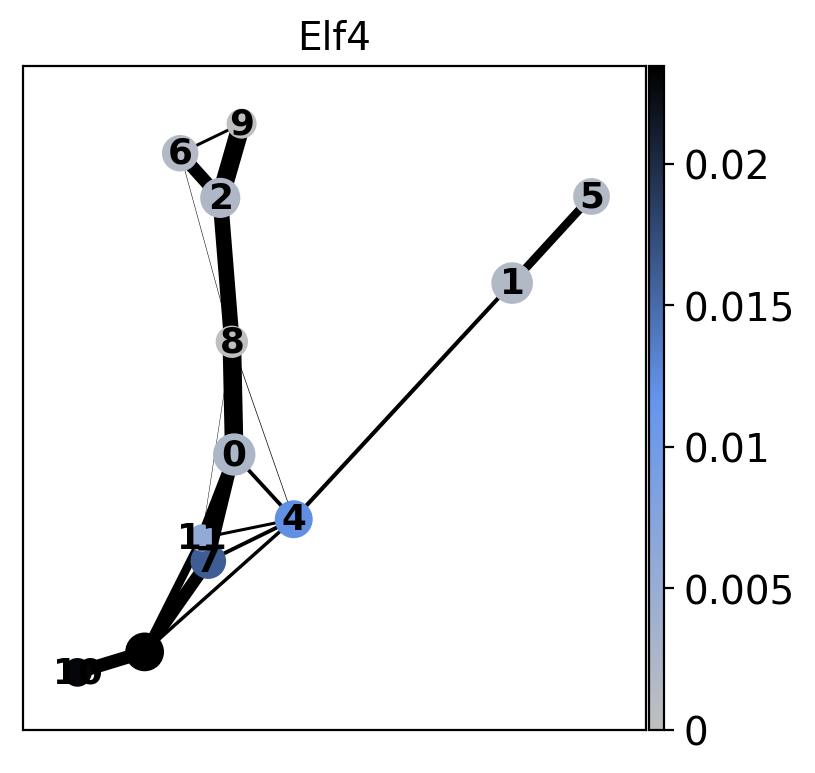

--> added 'pos', the PAGA positions (adata.uns['paga'])


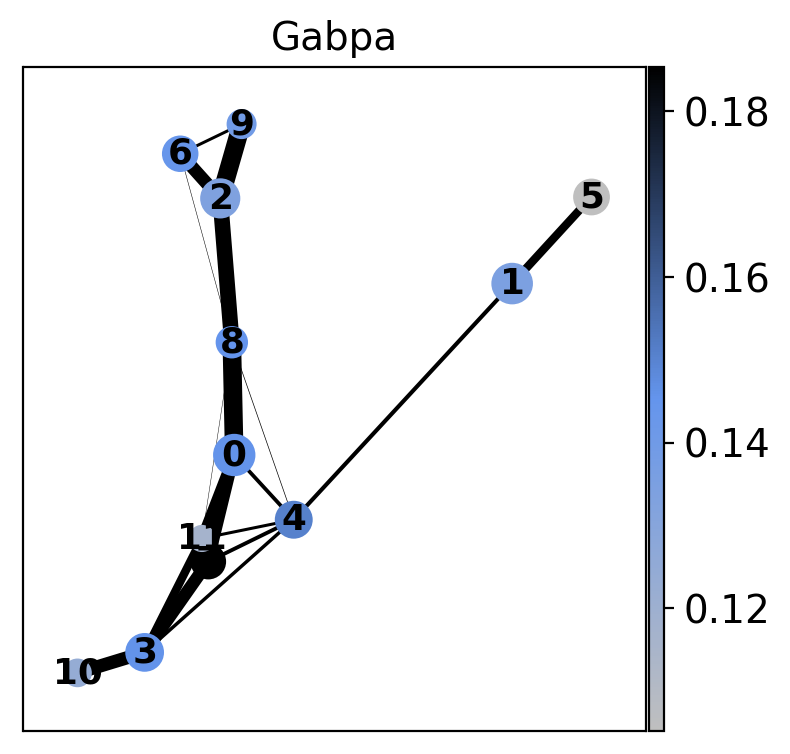

--> added 'pos', the PAGA positions (adata.uns['paga'])


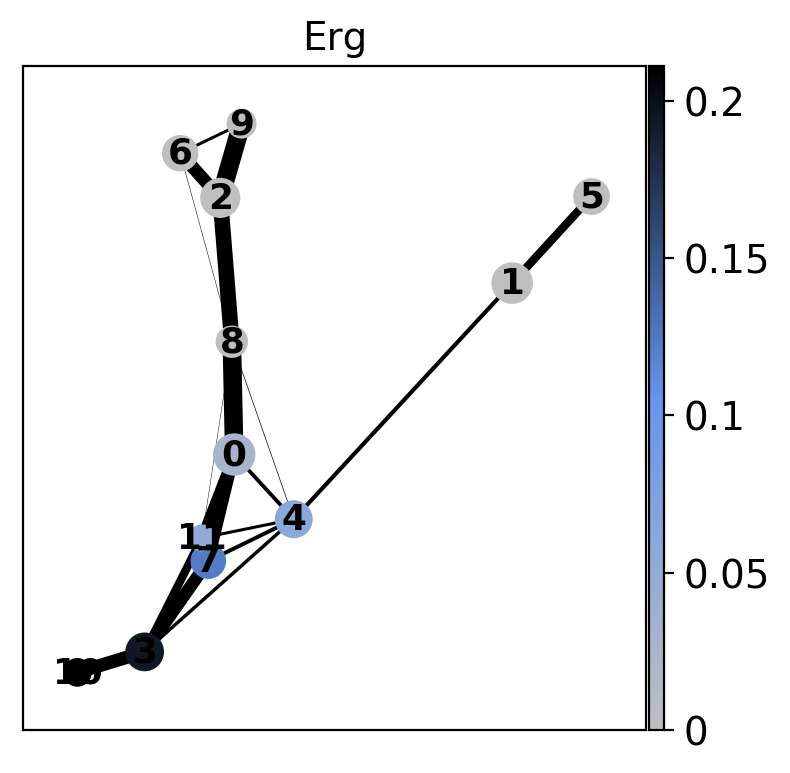

--> added 'pos', the PAGA positions (adata.uns['paga'])


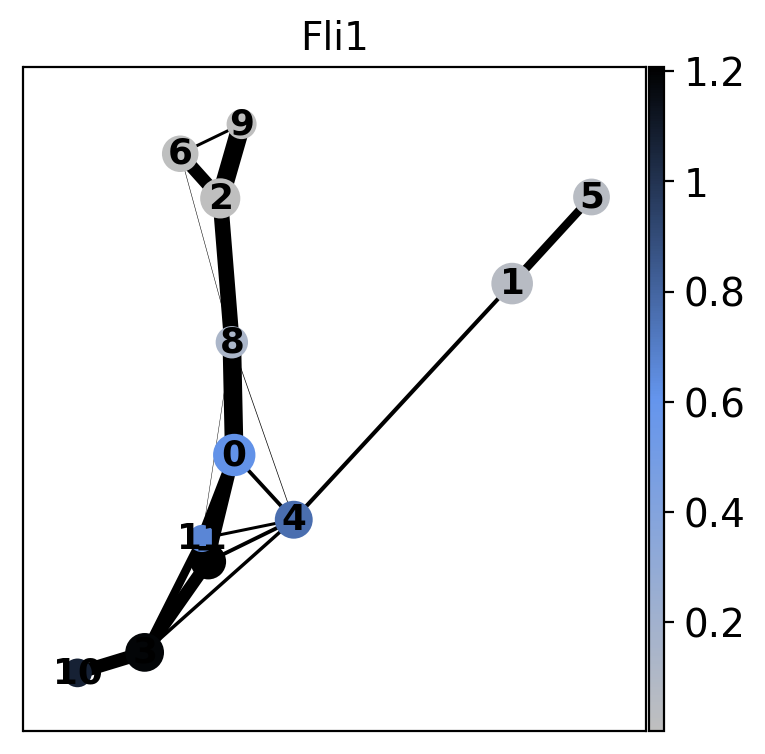

--> added 'pos', the PAGA positions (adata.uns['paga'])


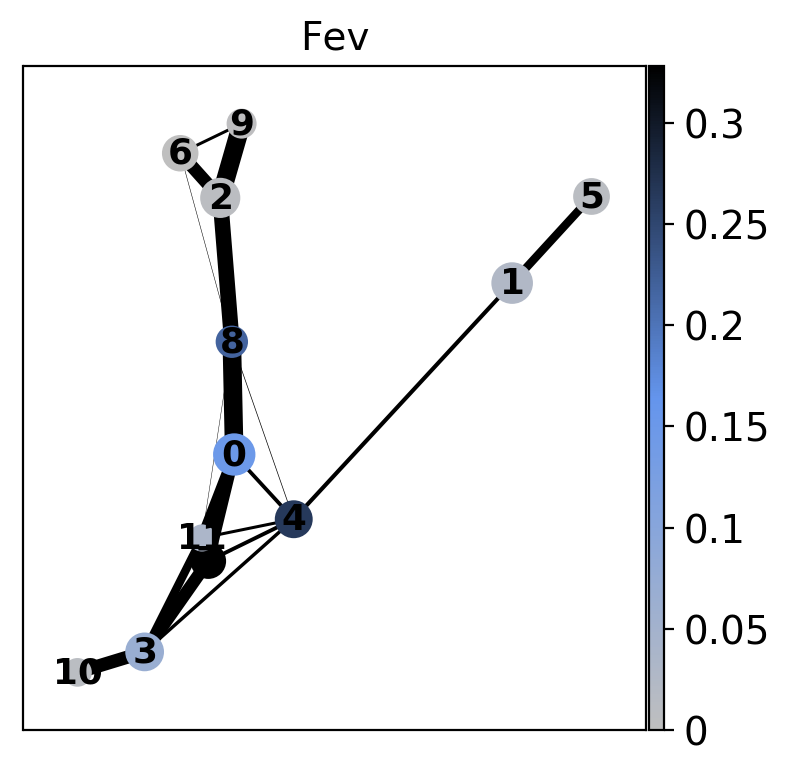

--> added 'pos', the PAGA positions (adata.uns['paga'])


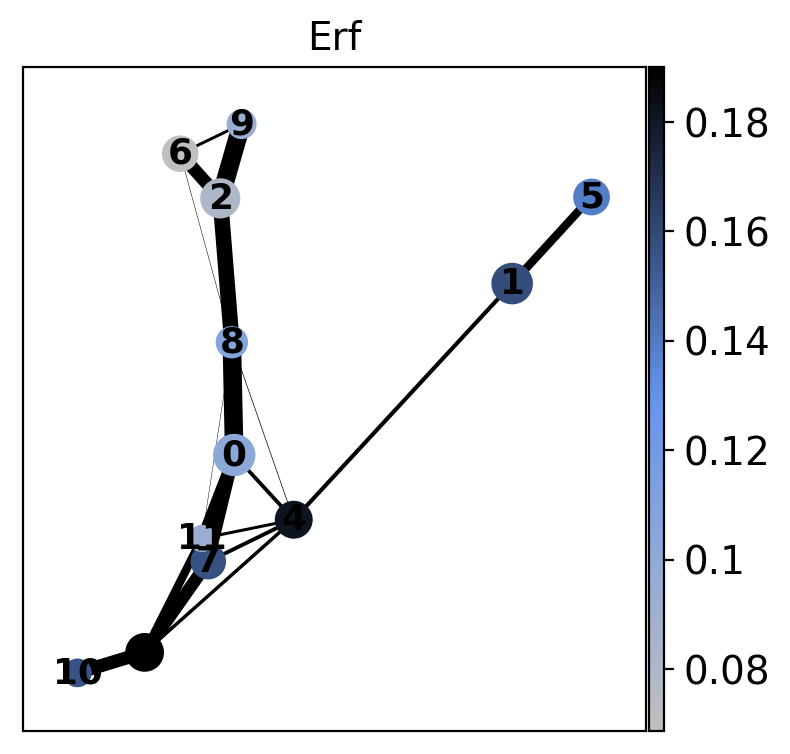

--> added 'pos', the PAGA positions (adata.uns['paga'])


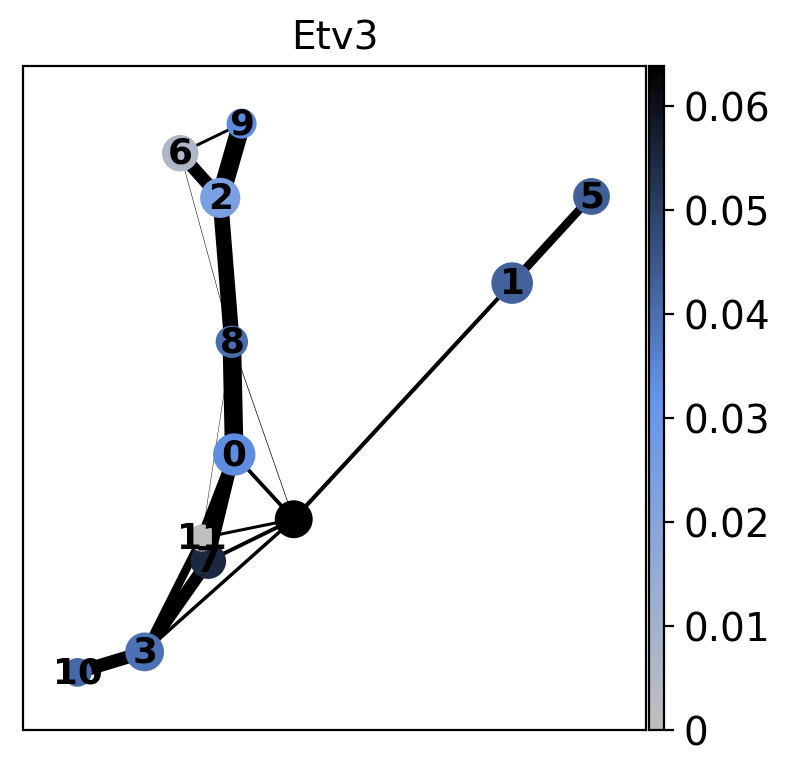

--> added 'pos', the PAGA positions (adata.uns['paga'])


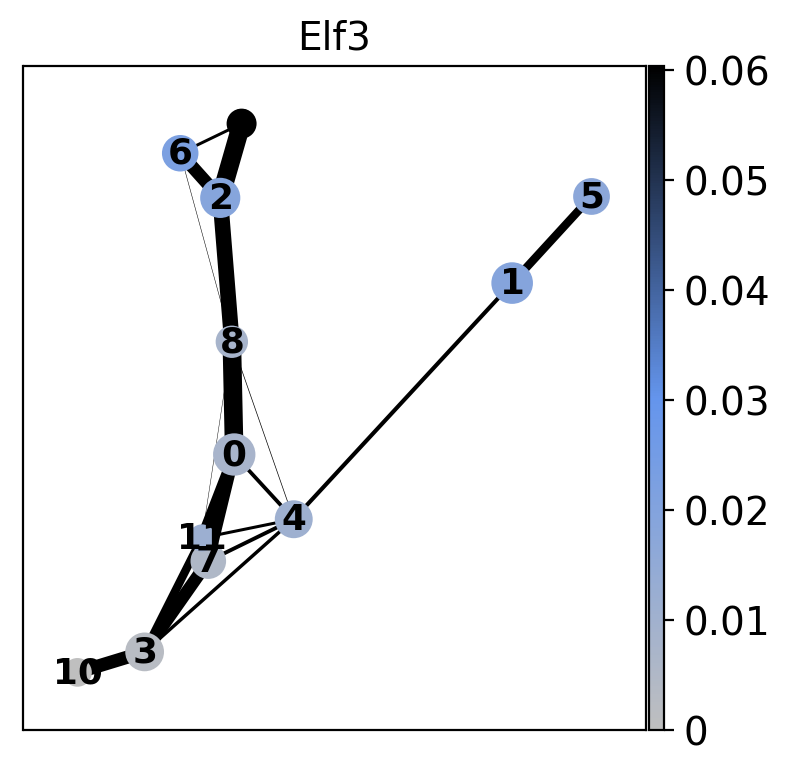

--> added 'pos', the PAGA positions (adata.uns['paga'])


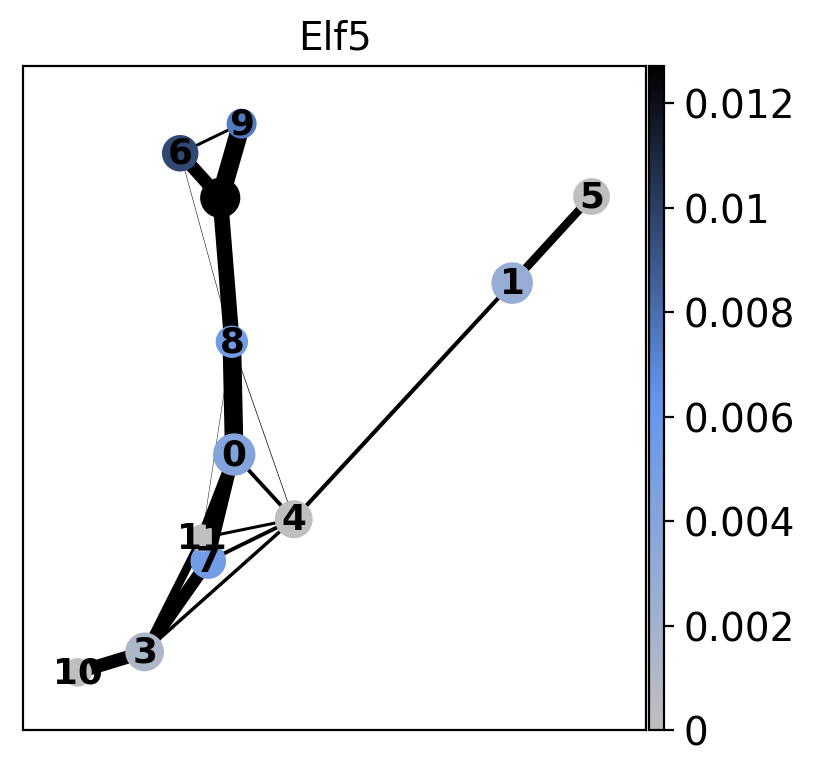

--> added 'pos', the PAGA positions (adata.uns['paga'])


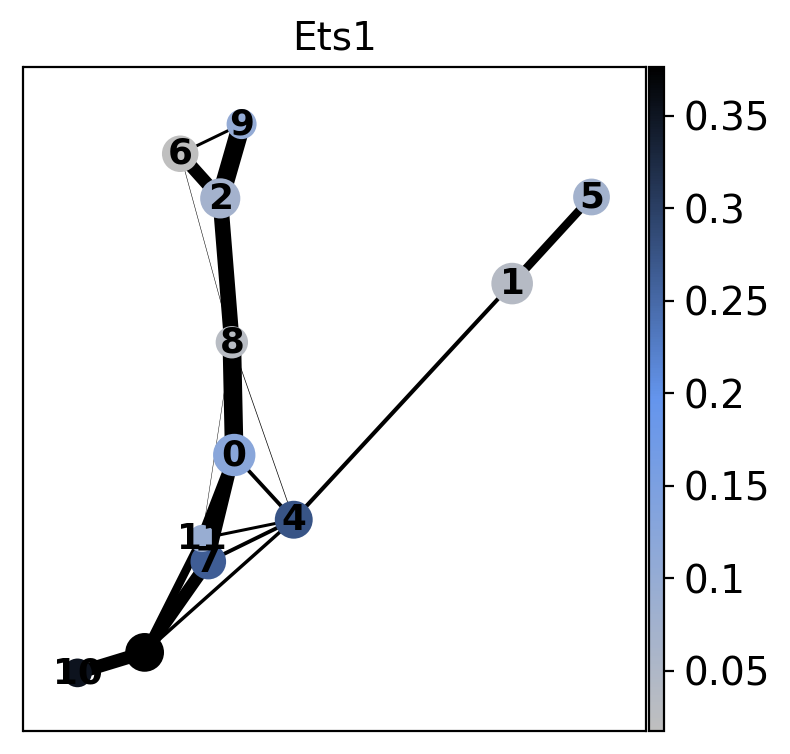

--> added 'pos', the PAGA positions (adata.uns['paga'])


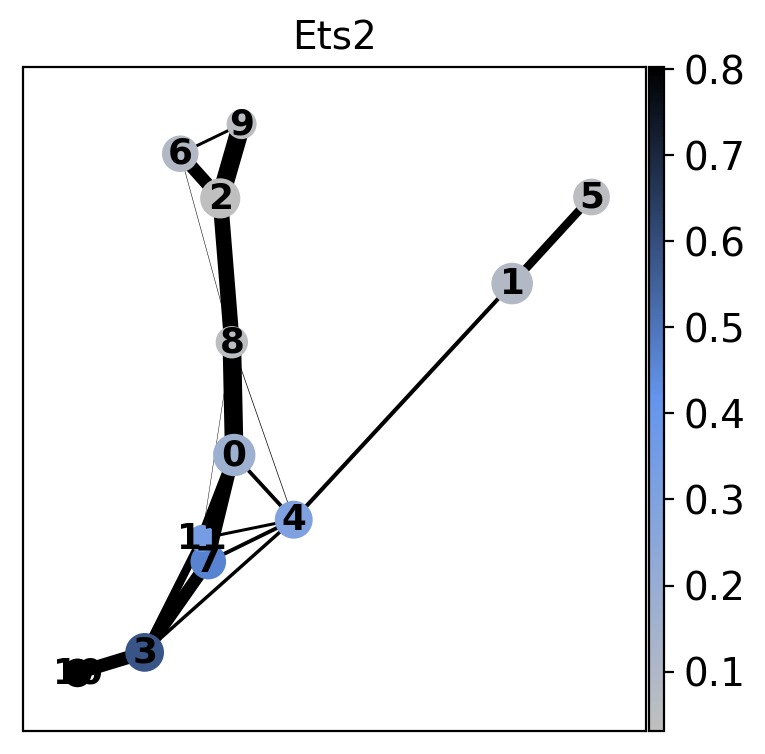

--> added 'pos', the PAGA positions (adata.uns['paga'])


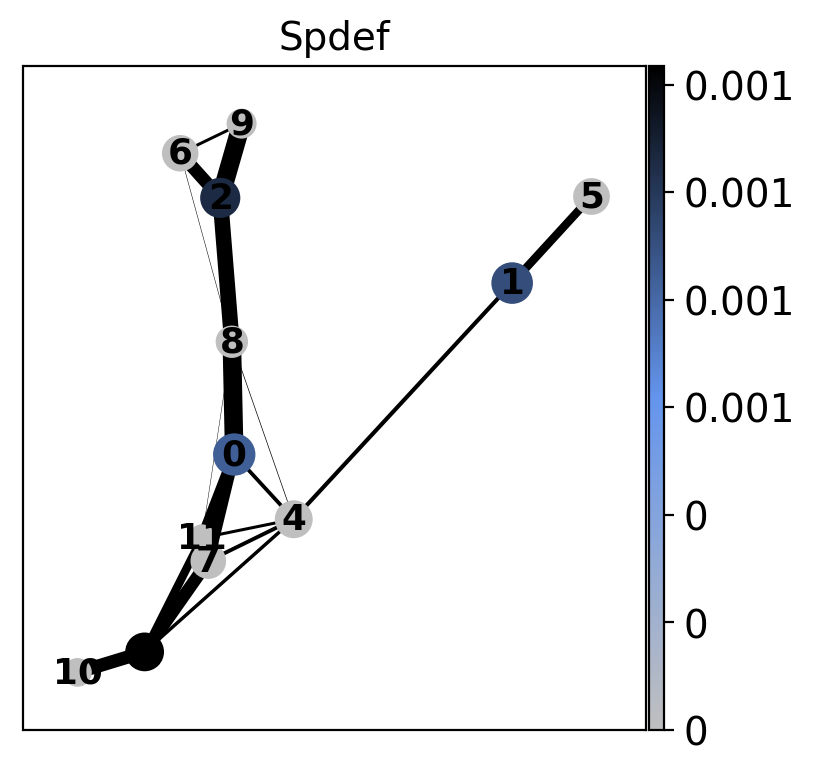

--> added 'pos', the PAGA positions (adata.uns['paga'])


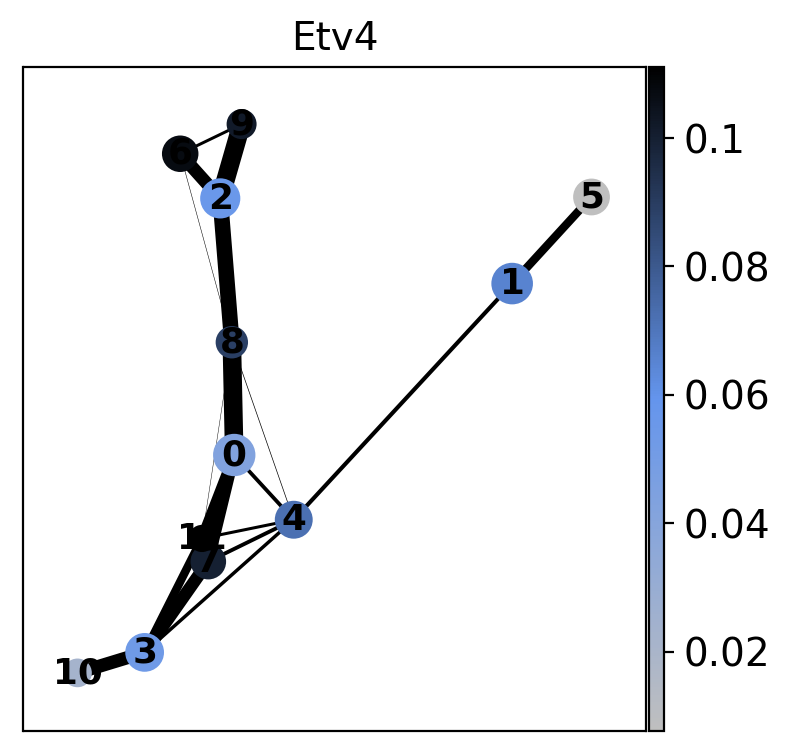

--> added 'pos', the PAGA positions (adata.uns['paga'])


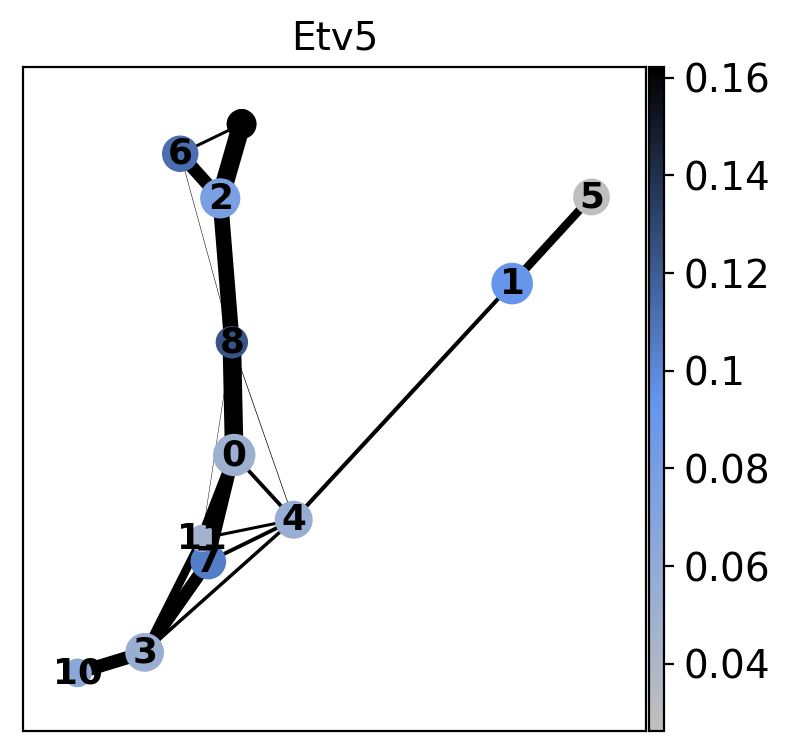

--> added 'pos', the PAGA positions (adata.uns['paga'])


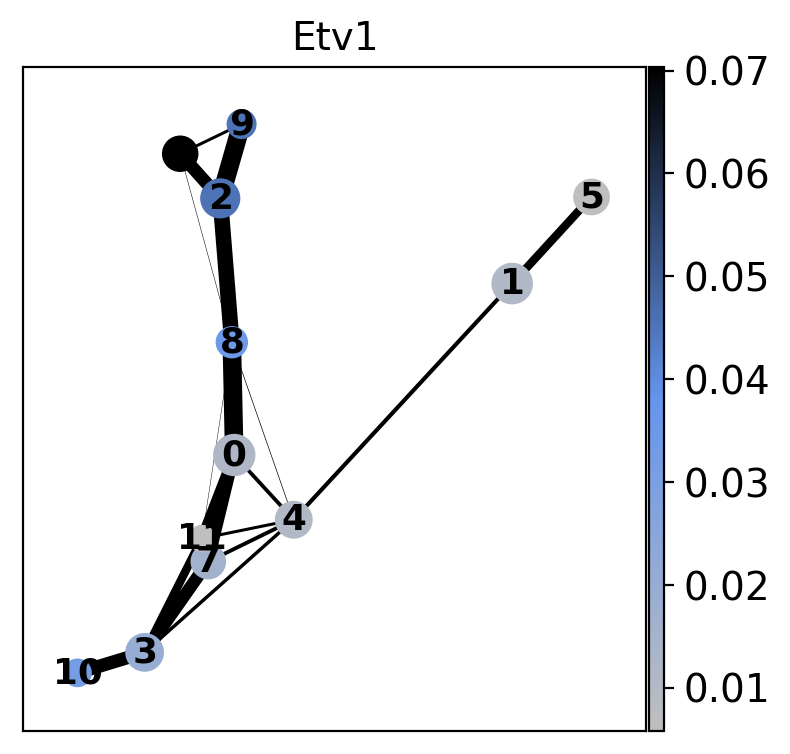

--> added 'pos', the PAGA positions (adata.uns['paga'])


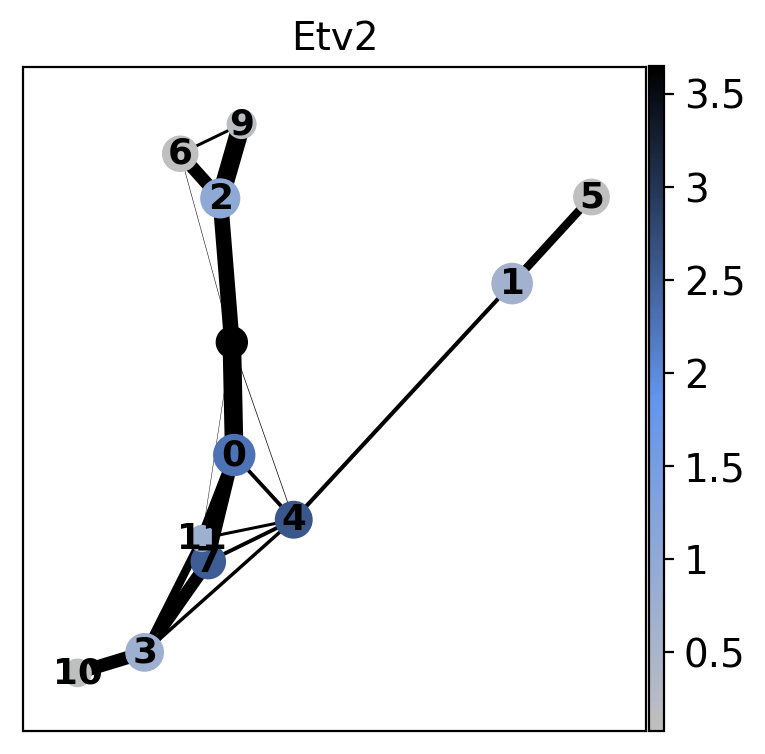

--> added 'pos', the PAGA positions (adata.uns['paga'])


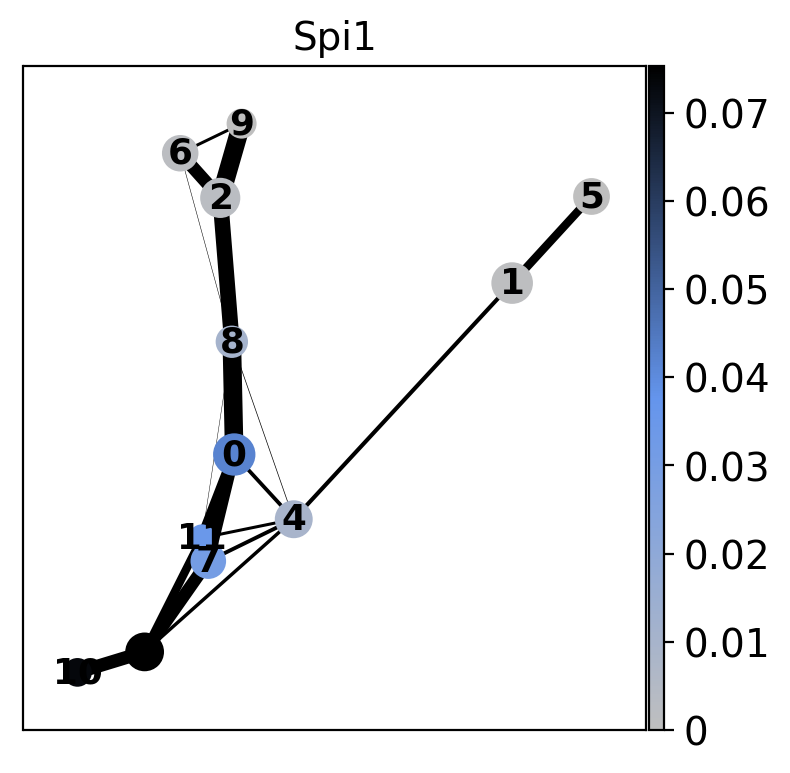

--> added 'pos', the PAGA positions (adata.uns['paga'])


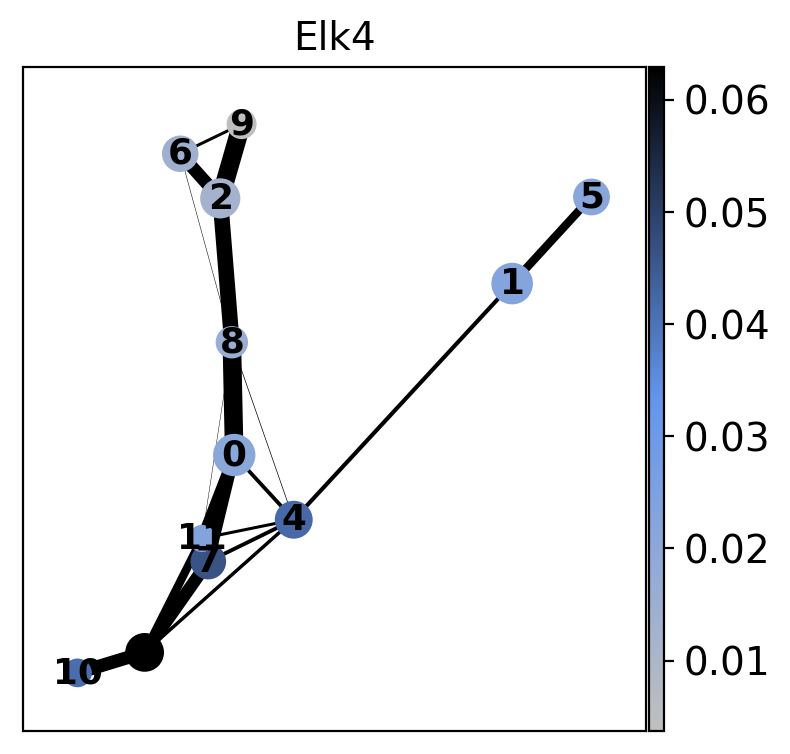

--> added 'pos', the PAGA positions (adata.uns['paga'])


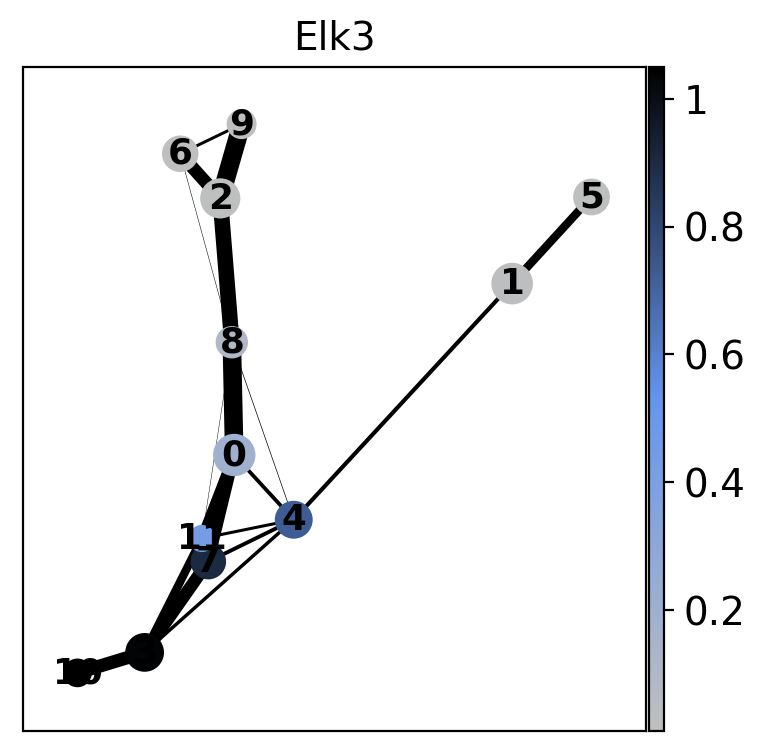

--> added 'pos', the PAGA positions (adata.uns['paga'])


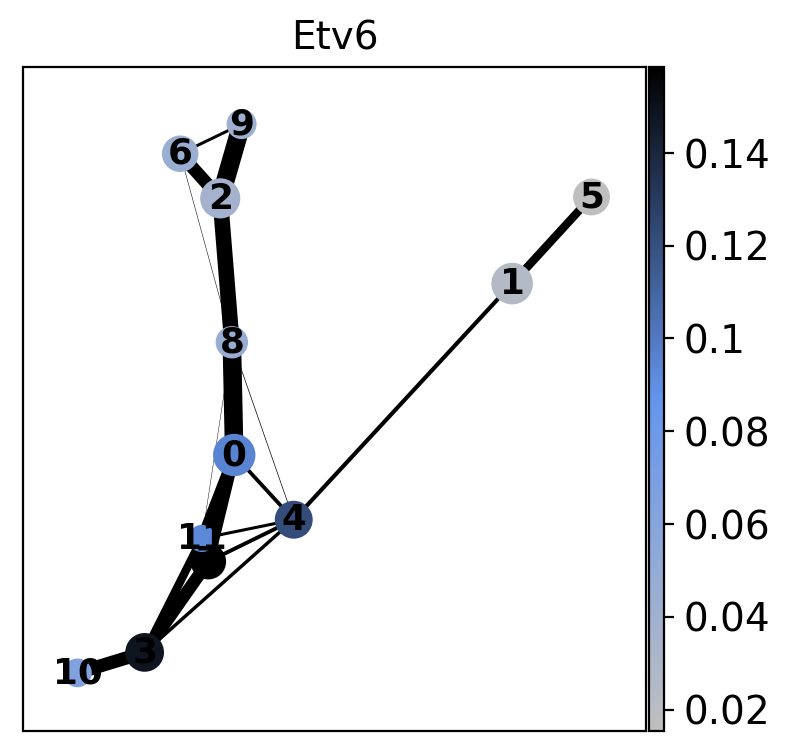

--> added 'pos', the PAGA positions (adata.uns['paga'])


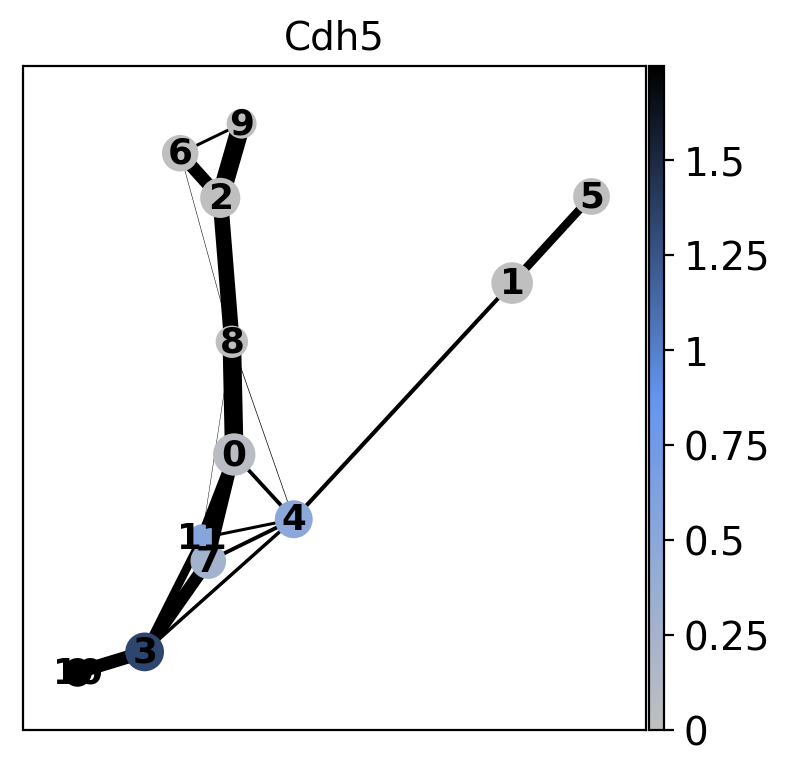

In [132]:
genes = ["ENSMUSG00000036461", "ENSMUSG00000037174", "ENSMUSG00000031103" ,"ENSMUSG00000008976",
 "ENSMUSG00000040732" ,"ENSMUSG00000016087", "ENSMUSG00000055197", "ENSMUSG00000040857",
 "ENSMUSG00000003382", "ENSMUSG00000003051", "ENSMUSG00000027186", "ENSMUSG00000032035",
 "ENSMUSG00000022895" ,"ENSMUSG00000024215" ,"ENSMUSG00000017724" ,"ENSMUSG00000013089",
 "ENSMUSG00000004151" ,"ENSMUSG00000006311", "ENSMUSG00000002111" ,"ENSMUSG00000026436",
 "ENSMUSG00000008398" ,"ENSMUSG00000030199",
    
    'ENSMUSG00000031871']

geneNames = ["Elf1",  "Elf2" , "Elf4" , "Gabpa", "Erg" ,  "Fli1" , "Fev"  , "Erf" ,  "Etv3"  ,"Elf3", 
             "Elf5" , "Ets1" , "Ets2" , "Spdef", "Etv4" , "Etv5"  ,"Etv1" , "Etv2" , "Spi1" , "Elk4",
             "Elk3" , "Etv6","Cdh5"]
#Etv2, Fev, Cdh5,Fli1,Erg,
for i in range(0,(len(genes))):
    sc.pl.paga(adata, color=genes[i],title=geneNames[i], cmap=cmap,pos=position)


--> added 'pos', the PAGA positions (adata.uns['paga'])


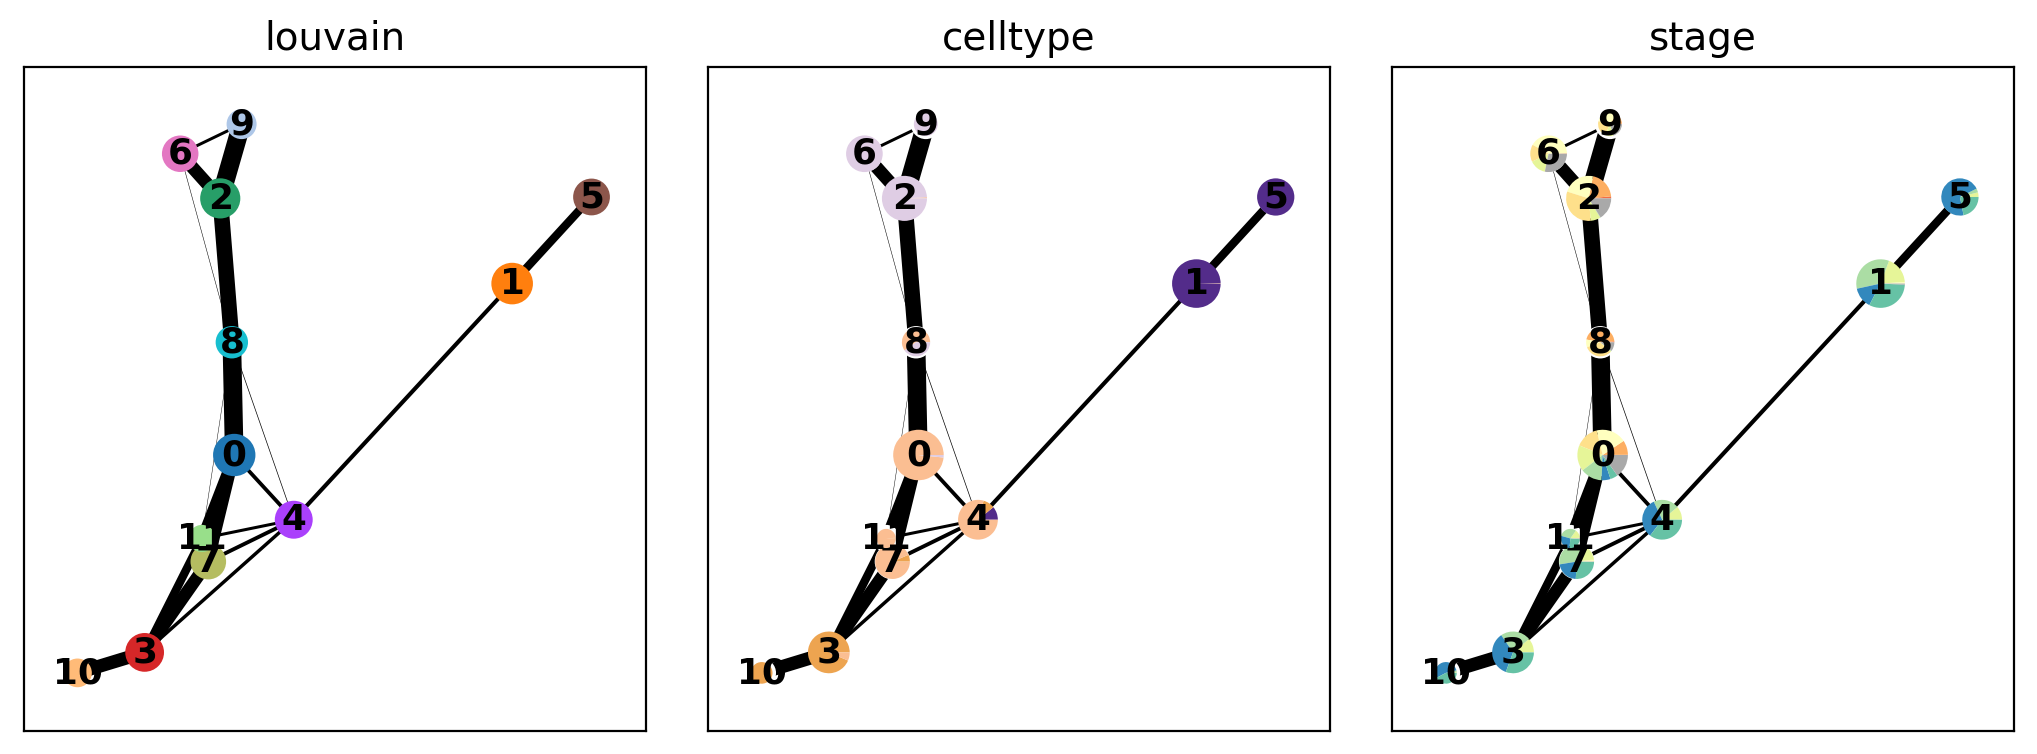

In [133]:
sc.pl.paga(adata, color=['louvain',"celltype","stage"],pos=position)


In [184]:
#save clusters
cellNames = pd.DataFrame(data=adata.obs_names)
cellNames.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_cellNames.csv', sep=',')

fa = pd.DataFrame(data=adata.obsm['X_draw_graph_fa'])
fa.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_FA.csv', sep=',')

louvain = pd.DataFrame(data=adata.obs['louvain'])
louvain.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_Louvain.csv', sep=',')


# From allantois to endothelium DPT

In [136]:
adata_al = adata[np.array([str(i) in ['1','4'] for i in adata.obs['louvain']]),:]


In [139]:
cellStart = np.argmax(adata_al.obsm['X_draw_graph_fa'][:,1])
cellStart

list(adata_al.obs['louvain'])[cellStart]

adata_al.obs_names[cellStart]

adata_al.uns['iroot'] = cellStart


1833


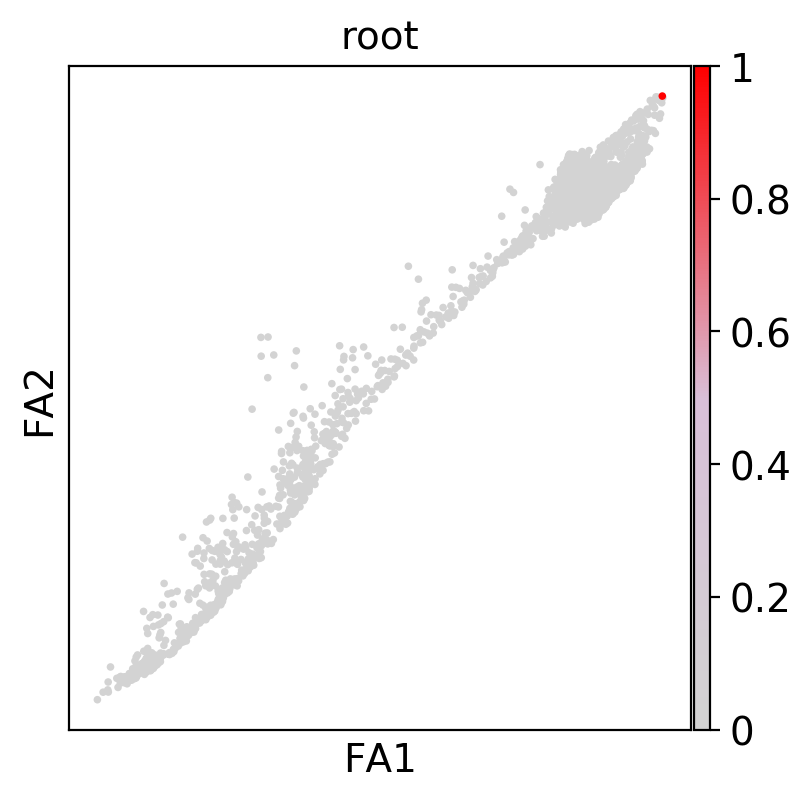

1333


In [140]:

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red'])

d = list([0] * len(adata_al.obs_names))
d[cellStart] = 1
e = list([1] * len(adata_al.obs_names))
e[cellStart] = 100
print(len(adata_al.obs_names))
#print(d)
adata_al.obs['trial'] = d
sc.pl.scatter(adata_al,basis="draw_graph_fa",color='trial',title="root",size=30,color_map=cmap)
print(adata_al.uns['iroot'])

In [141]:
sc.tl.dpt(adata_al)


computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


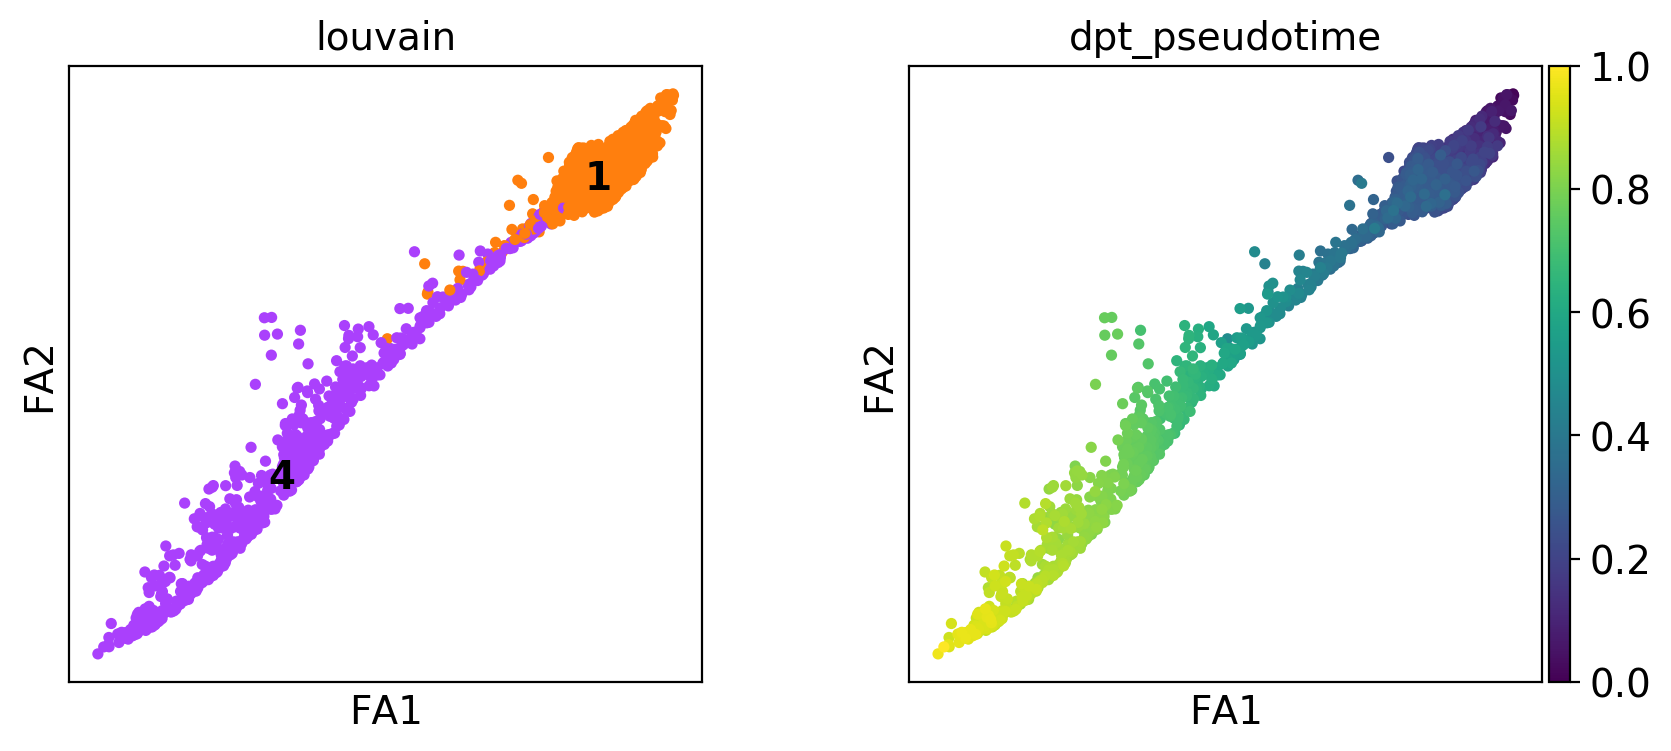

In [142]:
sc.pl.draw_graph(adata_al, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')


In [146]:
#save clusters
cellNames = pd.DataFrame(data=adata_al.obs_names)
cellNames.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_allantois_DPTtraj_cellNames.csv', sep=',')

dpt = pd.DataFrame(data=adata_al.obs['dpt_pseudotime'])
dpt.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_allantois_DPTtraj_dpt.csv', sep=',')


# From mixed mesoderm to endothelium DPT

In [147]:
adata_mixed = adata[np.array([str(i) in ['8','0','11','7','3'] for i in adata.obs['louvain']]),:]


In [148]:
cellStart = np.argmax(adata_mixed.obsm['X_draw_graph_fa'][:,1])
cellStart

list(adata_mixed.obs['louvain'])[cellStart]

adata_mixed.obs_names[cellStart]

adata_mixed.uns['iroot'] = cellStart


Trying to set attribute `.uns` of view, making a copy.


3100


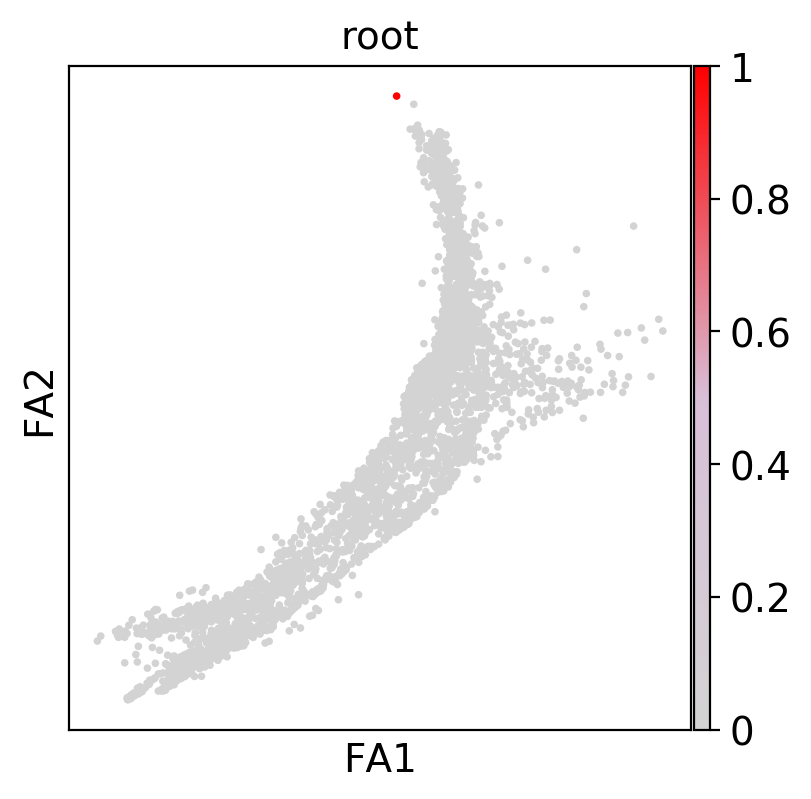

1841


In [149]:

from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red'])

d = list([0] * len(adata_mixed.obs_names))
d[cellStart] = 1
e = list([1] * len(adata_mixed.obs_names))
e[cellStart] = 100
print(len(adata_mixed.obs_names))
#print(d)
adata_mixed.obs['trial'] = d
sc.pl.scatter(adata_mixed,basis="draw_graph_fa",color='trial',title="root",size=30,color_map=cmap)
print(adata_mixed.uns['iroot'])

In [150]:
sc.tl.dpt(adata_mixed)


computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


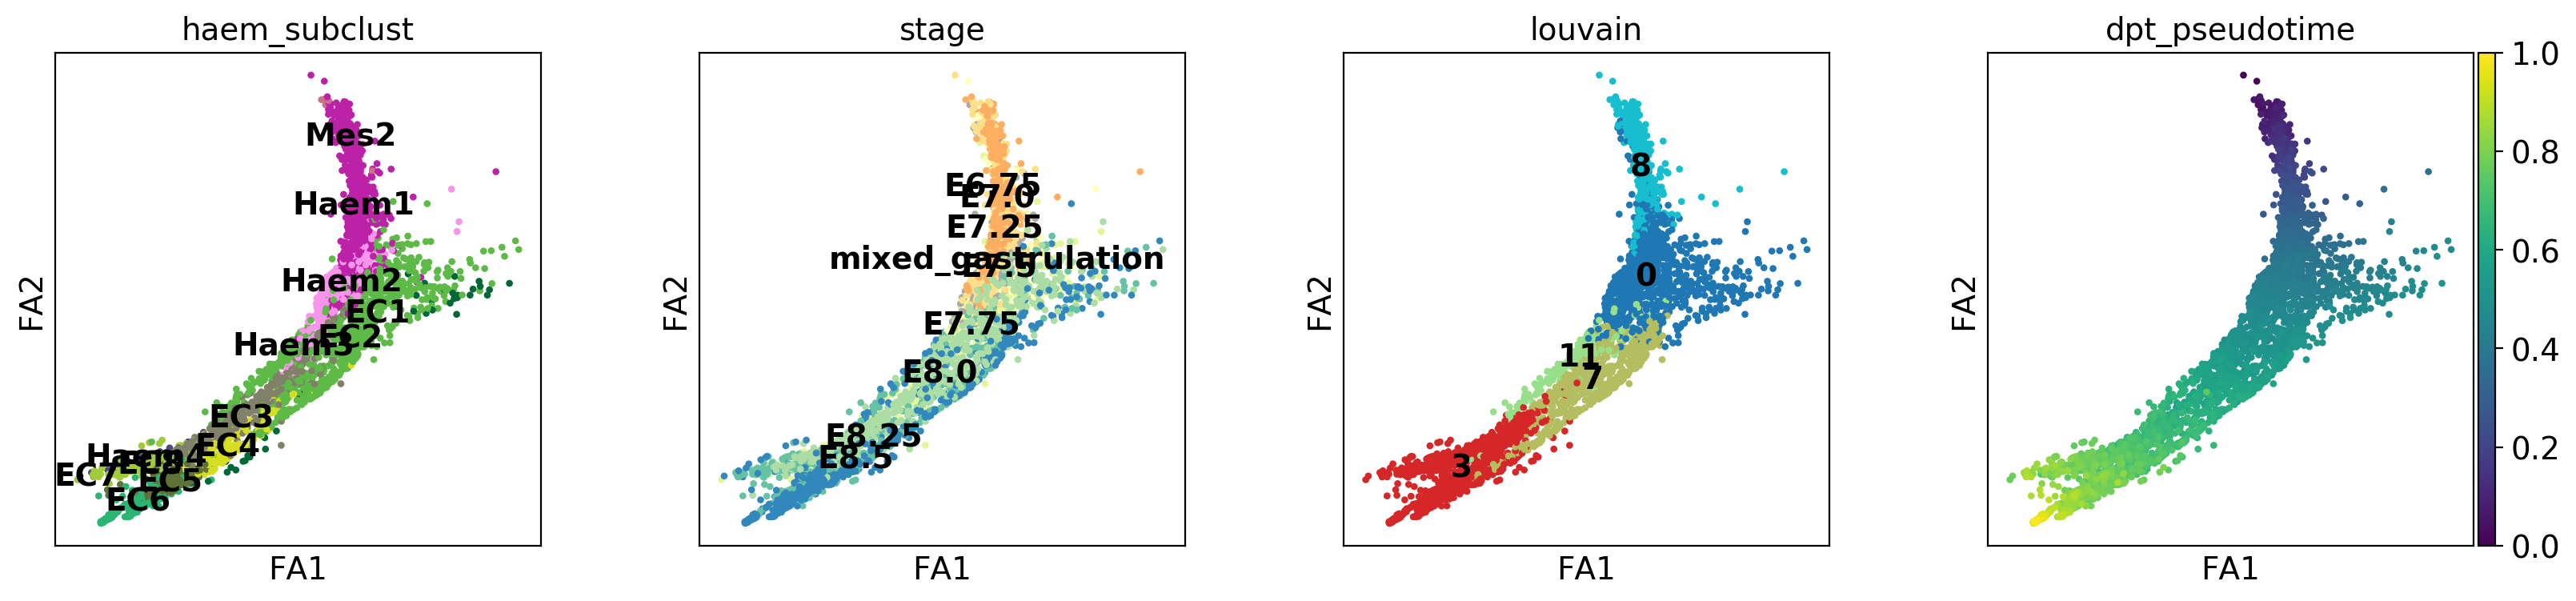

In [154]:
sc.pl.draw_graph(adata_mixed, color=['haem_subclust','stage','louvain', 'dpt_pseudotime'], legend_loc='on data')


In [155]:
#save clusters
cellNames = pd.DataFrame(data=adata_mixed.obs_names)
cellNames.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_MixedMeso_DPTtraj_cellNames.csv', sep=',')

dpt = pd.DataFrame(data=adata_mixed.obs['dpt_pseudotime'])
dpt.to_csv(direc + '21_endothelium_scRNAseq/data/snATACseq_embryo_revision1_endothelium_scRNAseq_MixedMeso_DPTtraj_dpt.csv', sep=',')
